In [11]:
import geopandas as gpd
import pandas as pd
from scipy.stats import pearsonr, spearmanr
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
# Function to calculate correlations and mutual information
def calculate_statistics(data, target_column):
    results = []
    
    # Ensure the target column exists
    if target_column not in data.columns:
        raise ValueError(f"Target column '{target_column}' not found in DataFrame.")

    # Loop through each column except the target column
    for col in data.columns:
        if col == target_column:
            continue

        print(f"Calculating statistics for '{col}'...")

        # Drop NA values for pairwise comparison
        valid_data = data[[col, target_column]].dropna()

        if len(valid_data) <= 2:
            # Append results
            results.append({
                'Parameter': col,
                'Pearson Correlation': None,
                'Pearson p-value': None,
                'Spearman Correlation': None,
                'Spearman p-value': None,
                'Mutual Information': None
            })
        else:

            x = valid_data[col]
            y = valid_data[target_column]

            # Calculate Pearson correlation
            pearson_corr, pearson_pval = pearsonr(x, y)

            # Calculate Spearman's rank correlation
            spearman_corr, spearman_pval = spearmanr(x, y)

            # Calculate mutual information
            if len(x) < 4:
                mi = None
            else:
                mi = mutual_info_regression(x.values.reshape(-1, 1), y)[0]

            # Append results
            results.append({
                'Parameter': col,
                'Pearson Correlation': pearson_corr,
                'Pearson p-value': pearson_pval,
                'Spearman Correlation': spearman_corr,
                'Spearman p-value': spearman_pval,
                'Mutual Information': mi
            })

    return pd.DataFrame(results)

# Example usage
if __name__ == "__main__":
    # Example DataFrame with urban form variables and temperature
    data = pd.DataFrame({
        'Building Area': [100, 150, 200, 250, 300],
        'Building Height': [10, 12, 15, 18, 20],
        'Vegetation Index': [0.3, 0.35, 0.4, 0.45, 0.5],
        'Temperature': [22, 24, 26, 25, 27]
    })

    target_column = 'Temperature'
    stats = calculate_statistics(data, target_column)
    print(stats)


Calculating statistics for 'Building Area'...
Calculating statistics for 'Building Height'...
Calculating statistics for 'Vegetation Index'...
          Parameter  Pearson Correlation  Pearson p-value  \
0     Building Area             0.904194         0.035082   
1   Building Height             0.882618         0.047417   
2  Vegetation Index             0.904194         0.035082   

   Spearman Correlation  Spearman p-value  Mutual Information  
0                   0.9          0.037386            0.250000  
1                   0.9          0.037386            0.250000  
2                   0.9          0.037386            0.183333  


Temperature

In [6]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']

In [7]:
temp['datetime_UTC'] = temp['datetime_UTC'].astype(str)
temp = temp.pivot(index='station_id', columns='datetime_UTC', values='value')

Urban form

In [22]:
params

BuAdj BuIBD  BuAre_count  BuAre_mean  BuAre_median  BuAre_std  \
station_id                                                                  
FRGLBA        NaN  None            2  100.203100    100.203100   6.857816   
FRKART        NaN  None            2  132.369977    132.369977  16.273863   
FRLAND        0.5  None            5   93.628429     80.912761  28.615974   
FRSTUH        0.5  None            3  108.553530    111.664025  15.924708   

             BuAre_min   BuAre_max   BuAre_sum  BuAre_nunique  BuAre_mode  \
station_id                                                                  
FRGLBA       95.353892  105.052308  200.406200              2   95.353892   
FRKART      120.862618  143.877336  264.739954              2  120.862618   
FRLAND       80.529263  144.817179  468.142143              5   80.529263   
FRSTUH       91.303063  122.693504  325.660591              3   91.303063   

            BuAre_IQR  BuAre_MAD    BuAre_skew  BuHt_count  BuHt_mean  \
station_id                                                              
FRGLBA       4.849208   4.849208 -4.424214e-15           2  11.687000   
FRKART      11.507359  11.507359  3.730381e-15           2  12.607500   
FRLAND       0.164141   0.110780  1.499845e+00           5   5.930000   
FRSTUH      15.695220  11.029479 -3.451448e-01           3  11.164333   

            BuHt_median  BuHt_std  BuHt_min  BuHt_max  BuHt_sum  BuHt_nunique  \
station_id                                                                      
FRGLBA          11.6870  1.834235    10.390    12.984    23.374             2   
FRKART          12.6075  0.762968    12.068    13.147    25.215             2   
FRLAND           6.3350  0.957165     4.220     6.420    29.650             5   
FRSTUH          10.9130  1.224500    10.085    12.495    33.493             3   

            BuHt_mode  BuHt_IQR  BuHt_MAD     BuHt_skew  BuPer_count  \
station_id                                                             
FRGLBA         10.390    1.2970    1.2970 -2.137173e-15            2   
FRKART         12.068    0.5395    0.5395  0.000000e+00            2   
FRLAND          4.220    0.0930    0.0490 -1.490263e+00            5   
FRSTUH         10.085    1.2050    0.8280  3.611894e-01            3   

            BuPer_mean  BuPer_median  BuPer_std  BuPer_min  BuPer_max  \
station_id                                                              
FRGLBA       42.297993     42.297993   2.774204  40.336335  44.259652   
FRKART       47.615202     47.615202   4.792442  44.226434  51.003971   
FRLAND       39.684670     37.438340   5.038376  37.379107  48.697033   
FRSTUH       46.557993     48.202739   4.997158  40.945767  50.525474   

             BuPer_sum  BuPer_nunique  BuPer_mode  BuPer_IQR  BuPer_MAD  \
station_id                                                                
FRGLBA       84.595987              2   40.336335   1.961659   1.961659   
FRKART       95.230405              2   44.226434   3.388768   3.388768   
FRLAND      198.423348              5   37.379107   0.132135   0.059233   
FRSTUH      139.673980              3   40.945767   4.789854   2.322735   

              BuPer_skew  BuLAL_count  BuLAL_mean  BuLAL_median  BuLAL_std  \
station_id                                                                   
FRGLBA     -5.412373e-15            2   14.009880     14.009880   0.269777   
FRKART      0.000000e+00            2   16.965375     16.965375   0.981625   
FRLAND      1.499537e+00            5   14.350855     13.593882   1.712593   
FRSTUH     -5.391584e-01            3   16.747941     17.518469   2.244989   

            BuLAL_min  BuLAL_max  BuLAL_sum  BuLAL_nunique  BuLAL_mode  \
station_id                                                               
FRGLBA      13.819119  14.200641  28.019759              2   13.819119   
FRKART      16.271261  17.659488  33.930749              2   16.271261   
FRLAND      13.559823  17.414314  71.754276              5   13.559823  

In [26]:
time = '2023-08-22 04:00:00+00:00'
radii = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200,250,300,400,500,750]
stats_dict = {}
for i in tqdm(radii):
    params = gpd.read_parquet(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_{i}.parquet')
    params = params.set_index('station_id')
    if params.empty:
        continue
    if 'FRTECH' in params.index:
        params = params[params.index!='FRTECH']

    to_remove = ['station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
    params = params.drop(to_remove, axis=1)
    params = params.merge(temp[time], left_on='station_id', right_on='station_id',how='inner')
    stats = calculate_statistics(params, time)
    stats.to_csv(f'/Users/lisawink/Documents/paper1/data/processed_data/processed_station_stats_{i}.csv', index=False)
    stats_dict[i] = stats

  5%|▌         | 1/20 [00:00<00:02,  6.87it/s]

Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics for 'BuAre_skew'...
Calculating statistics for 'BuHt_count'...
Calculating statistics for 'BuHt_mean'...
Calculating statistics for 'BuHt_median'...
Calculating statistics for 'BuHt_std'...
Calculating statistics for 'BuHt_min'...
Calculating statistics for 'BuHt_max'...
Calculating statistics for 'BuHt_sum'...
Calculating statistics for 'BuHt_nunique'...
Calculating statistics for 'BuHt_mode'...
Calculating statistics for '

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCCo_mode'...
Calculating statistics for 'BuCCo_IQR'...
Calculating statistics for 'BuCCo_MAD'...
Calculating statistics for 'BuCCo_skew'...
Calculating statistics for 'BuCWA_count'...
Calculating statistics for 'BuCWA_mean'...
Calculating statistics for 'BuCWA_median'...
Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating st

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BumVE_3D_nunique'...
Calculating statistics for 'BumVE_3D_mode'...
Calculating statistics for 'BumVE_3D_IQR'...
Calculating statistics for 'BumVE_3D_MAD'...
Calculating statistics for 'BumVE_3D_skew'...
Calculating statistics for 'BuMVE_3D_count'...
Calculating statistics for 'BuMVE_3D_mean'...
Calculating statistics for 'BuMVE_3D_median'...
Calculating statistics for 'BuMVE_3D_std'...
Calculating statistics for 'BuMVE_3D_min'...
Calculating statistics for 'BuMVE_3D_max'...
Calculating statistics for 'BuMVE_3D_sum'...
Calculating statistics for 'BuMVE_3D_nunique'...
Calculating statistics for 'BuMVE_3D_mode'...
Calculating statistics for 'BuMVE_3D_IQR'...
Calculating statistics for 'BuMVE_3D_MAD'...
Calculating statistics for 'BuMVE_3D_skew'...
Calculating statistics for 'BuFF_3D_count'...
Calculating statistics for 'BuFF_3D_mean'...
Calculating statistics for 'BuFF_3D_median'...
Calculating statistics for 'BuFF_3D_std'...
Calculating statistics for 'BuFF_3D

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating statistics for 'BuPerC_max'...
Calculating statistics for 'BuPerC_sum'...
Calculating statistics for 'BuPerC_nunique'...
Calculating statistics for 'BuPerC_mode'...
Calculating statistics for 'BuPerC_IQR'...
Calculating statistics for 'BuPerC_MAD'...
Calculating statistics for 'BuPerC_skew'...
Calculating statistics for 'BuCf_3D_count'...
Calculating statistics for 'BuCf_3D_mean'...
Calculating statistics for 'BuCf_3D_median'...
Calculating statistics for 'BuCf_3D_std'...
Calculating statistics for 'BuCf_3D_min'...
Calculating statistics for 'BuCf_3D_max'...
Calculating statistics for 'BuCf_3D_sum'...
Calculating statistics

 10%|█         | 2/20 [00:03<00:31,  1.75s/it]

Calculating statistics for 'StrGam400_nunique'...
Calculating statistics for 'StrGam400_mode'...
Calculating statistics for 'StrGam400_IQR'...
Calculating statistics for 'StrGam400_MAD'...
Calculating statistics for 'StrGam400_skew'...
Calculating statistics for 'StrCyc400_count'...
Calculating statistics for 'StrCyc400_mean'...
Calculating statistics for 'StrCyc400_median'...
Calculating statistics for 'StrCyc400_std'...
Calculating statistics for 'StrCyc400_min'...
Calculating statistics for 'StrCyc400_max'...
Calculating statistics for 'StrCyc400_sum'...
Calculating statistics for 'StrCyc400_nunique'...
Calculating statistics for 'StrCyc400_mode'...
Calculating statistics for 'StrCyc400_IQR'...
Calculating statistics for 'StrCyc400_MAD'...
Calculating statistics for 'StrCyc400_skew'...
Calculating statistics for 'StrENR400_count'...
Calculating statistics for 'StrENR400_mean'...
Calculating statistics for 'StrENR400_median'...
Calculating statistics for 'StrENR400_std'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculating statistics for 'BuElo_max'...
Calculating statistics for 'BuElo_sum'...
Calculating statistics for 'BuElo_nunique'...
Calculating statistics for 'BuElo_mode'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating statistics for 'BuProx_3D_count'...
Calculating statistics for 'BuProx_3D_mean'...
Calculating statistics for 'BuProx_3D_median'...
Calculating statistics for 'BuProx_3D_std'...
Calculating statistics for 'BuProx_3D_min'...
Calculating statistics for 'BuProx_3D_max'...
Calculating statistics for 'BuProx_3D_sum'...
Calculating statistics for 'BuProx_3D_nunique'...
Calculating statistics for 'BuProx_3D_mode'...
Calculating statistics for 'BuProx_3D_IQR'...
Calculating statistics for 'BuProx_3D_MAD'...
Calculating statistics for 'BuProx_3D_skew'...
Calculating statistics for 'BuEx_count'...
Calculating statistics for 'BuEx_mean'...
Calculating statistics for 'BuEx_median'...


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating statistics for 'BuPerC_max'...
Calculating statistics for 'BuPerC_sum'...
Calculating statistics for 'BuPerC_nunique'...
Calculating statistics for 'BuPerC_mode'...
Calculating statistics for 'BuPerC_IQR'...
Calculating statistics for 'BuPerC_MAD'...
Calculating statistics for 'BuPerC_skew'...
Calculating statistics for 'BuCf_3D_count'...
Calculating statistics for 'BuCf_3D_mean'...
Calculating statistics for 'BuCf_3D_median'...
Calculating statistics for 'BuCf_3D_std'...
Calculating statistics for 'BuCf_3D_min'...
Calculating statistics for 'BuCf_3D_max'...
Calculating statistics for 'BuCf_3D_sum'...
Calculating statistics for 'BuCf_3D_nunique'...
Calculating statist

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'StrMes400_sum'...
Calculating statistics for 'StrMes400_nunique'...
Calculating statistics for 'StrMes400_mode'...
Calculating statistics for 'StrMes400_IQR'...
Calculating statistics for 'StrMes400_MAD'...
Calculating statistics for 'StrMes400_skew'...
Calculating statistics for 'StrGam400_count'...
Calculating statistics for 'StrGam400_mean'...
Calculating statistics for 'StrGam400_median'...
Calculating statistics for 'StrGam400_std'...
Calculating statistics for 'StrGam400_min'...
Calculating statistics for 'StrGam400_max'...
Calculating statistics for 'StrGam400_sum'...
Calculating statistics for 'StrGam400_nunique'...
Calculating statistics for 'StrGam400_mode'...
Calculating statistics for 'StrGam400_IQR'...
Calculating statistics for 'StrGam400_MAD'...
Calculating statistics for 'StrGam400_skew'...
Calculating statistics for 'StrCyc400_count'...
Calculating statistics for 'StrCyc400_mean'...
Calculating statistics for 'StrCyc400_median'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculating statistics for 'BuElo_max'...
Calculating statistics for 'BuElo_sum'...
Calculating statistics for 'BuElo_nunique'...
Calculating statistics for 'BuElo_mode'...
Calculating statistics for 'BuElo_IQR'...
Calculating statistics for 'BuElo_MAD'...
Calculating statistics for 'BuElo_skew'...
Calculating statistics for 'BuERI_count'...
Calculating

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating statistics for 'BuProx_3D_count'...
Calculating statistics for 'BuProx_3D_mean'...
Calculating statistics for 'BuProx_3D_median'...
Calculating statistics for 'BuProx_3D_std'...
Calculating statistics for 'BuProx_3D_min'...
Calculating statistics for 'BuProx_3D_max'...
Calculating statistics for 'BuProx_3D_sum'...
Calculating statistics for 'BuProx_3D_nunique'...
Calculating statistics for 'BuProx_3D_mode'...
Calculating statistics for 'BuProx_3D_IQR'...
C

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating statistics for 'BuPerC_max'...
Calculating statistics for 'BuPerC_sum'...
Calculating statistics for 'BuPerC_nunique'...
Calculating statistics for 'BuPerC_mode'...
Calculating statistics for 'BuPerC_IQR'...
Calculating statistics for 'BuPerC_MAD'...
Calculating statistics for 'BuPerC_skew'...
Calculating statistics for 'BuCf_3D_count'...
Calculating sta

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics for 'BuAre_skew'...
Calculating statistics for 'BuHt_count'...
Calculating statistics for 'BuHt_mean'...
Calculating statistics for 'BuHt_median'...
Calculating statistics for 'BuHt_std'...
Calculating statistics for 'BuHt_min'...
Calculating statistics for 'BuHt_max'...
Calculating statistics for 'BuHt_sum'...
Calculating statistics for 'BuHt_nunique'...
Calculating statistics for 'Bu

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculating statistics for 'BuElo_max'...
Calculating statistics for 'BuElo_sum'...
Calculating statistics for 'BuElo_nunique'...
Calculating statistics for 'BuElo_mode'...
Calculating statistics for 'BuElo_IQR'...
Calculating statistics for 'BuElo_MAD'...
Calculating statistics for 'BuElo_skew'...
Calculating 

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating statistics for 'BuProx_3D_count'...
Calculating statistics for 'BuProx_3D_mean'...
Calculating statistics for 'BuProx_3D_median'...
Calculating statistics for 'BuProx_3D_std'...
Calculating statistics for 'BuProx_3D_min'...
Calculating statistics for 'BuProx_3D_max'...
Calculating statistics for 'BuProx_3D_sum'...
Calculating statistics for 'BuProx_3D_nunique'...
Calculating statistics for 'BuProx_3D_mode'...
Calculating statistics for 'BuProx_3D_IQR'...
Calculating statistics for 'BuProx_3D_MAD'...
Calculating statistics for 'BuProx_3D_skew'...
Calculating statistics for 'BuEx_count'...
Calculating statistics for 'BuEx_mean'...
Calculating statistics for 'BuEx_median'...
Calculating statistics for 'BuEx_std'...
Calculating statistics for 'BuEx_min'...
Calculating statistics for 'BuEx_max'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating statistics for 'BuPerC_max'...
Calculating statistics for 'BuPerC_sum'...
Calculating statistics for 'BuPerC_nunique'...
Calculating statistics for 'BuPerC_mode'...
Calculating statistics for 'BuPerC_IQR'...
Calculating statistics for 'BuPerC_MAD'...
Calculating statistics for 'BuPerC_skew'...
Calculating statistics for 'BuCf_3D_count'...
Calculating statistics for 'BuCf_3D_mean'...
Calculating statistics for 'BuCf_3D_median'...
Calculating statistics for 'BuCf_3D_std'...
Calculating statistics for 'BuCf_3D_min'...
Calculating statistics for 'BuCf_3D_max'...
Calculating statistics for 'BuCf_3D_sum'...
Calculating statistics for 'BuCf_3D_nunique'...
Calculating statist

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'StrSCl_median'...
Calculating statistics for 'StrSCl_std'...
Calculating statistics for 'StrSCl_min'...
Calculating statistics for 'StrSCl_max'...
Calculating statistics for 'StrSCl_sum'...
Calculating statistics for 'StrSCl_nunique'...
Calculating statistics for 'StrSCl_mode'...
Calculating statistics for 'StrSCl_IQR'...
Calculating statistics for 'StrSCl_MAD'...
Calculating statistics for 'StrSCl_skew'...
Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistic

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'CyInd_mean'...
Calculating statistics for 'CyInd_median'...
Calculating statistics for 'CyInd_std'...
Calculating statistics for 'CyInd_min'...
Calculating statistics for 'CyInd_max'...
Calculating statistics for 'CyInd_sum'...
Calculating statistics for 'CyInd_nunique'...
Calculating statistics for 'CyInd_mode'...
Calculating statistics for 'CyInd_IQR'...
Calculating statistics for 'CyInd_MAD'...
Calculating statistics for 'CyInd_skew'...
Calculating statistics for 'BuCCo_count'...
Calculating statistics for 'BuCCo_mean'...
Calculating statistics for 'BuCCo_median'...
Calculating statistics for 'BuCCo_std'...
Calculating statistics for 'BuCCo_min'...
Calculating statistics for 'BuCCo_max'...
Calculating statistics for 'BuCCo_sum'...
Calculating statistics for 'BuCCo_nunique'...
Calculating statistics for 'BuCCo_mode'...
Calculating statistics for 'BuCCo_IQR'...
Calculating statistics for 'BuCCo_MAD'...
Calculating statistics for 'BuCCo_skew'...
Calculating 

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_3D_min'...
Calculating statistics for 'BuProx_3D_max'...
Calculating statistics for 'BuProx_3D_sum'...
Calculating statistics for 'BuProx_3D_nunique'...
Calculating statistics for 'BuProx_3D_mode'...
Calculating statistics for 'BuProx_3D_IQR'...
Calculating statistics for 'BuProx_3D_MAD'...
Calculating statistics for 'BuProx_3D_skew'...
Calculating statistics for 'BuEx_count'...
Calculating statistics for 'BuEx_mean'...
Calculating statistics for 'BuEx_median'...
Calculating statistics for 'BuEx_std'...
Calculating statistics for 'BuEx_min'...
Calculating statistics for 'BuEx_max'...
Calculating statistics for 'BuEx_sum'...
Calculating statistics for 'BuEx_nunique'...
Calculating statistics for 'BuEx_mode'...
Calculating statistics for 'BuEx_IQR'...
Calculating statistics for 'BuEx_MAD'...
Calculating statistics for 'BuEx_skew'...
Calculating statistics for 'BuEx_3D_count'...
Calculating statistics for 'BuEx_3D_mean'...
Calculating statistics for 'BuE

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuPerC_max'...
Calculating statistics for 'BuPerC_sum'...
Calculating statistics for 'BuPerC_nunique'...
Calculating statistics for 'BuPerC_mode'...
Calculating statistics for 'BuPerC_IQR'...
Calculating statistics for 'BuPerC_MAD'...
Calculating statistics for 'BuPerC_skew'...
Calculating statistics for 'BuCf_3D_count'...
Calculating statistics for 'BuCf_3D_mean'...
Calculating statistics for 'BuCf_3D_median'...
Calculating statistics for 'BuCf_3D_std'...
Calculating statistics for 'BuCf_3D_min'...
Calculating statistics for 'BuCf_3D_max'...
Calculating statistics for 'BuCf_3D_sum'...
Calculating statistics for 'BuCf_3D_nunique'...
Calculating statistics for 'BuCf_3D_mode'...
Calculating statistics for 'BuCf_3D_IQR'...
Calculating statistics for 'BuCf_3D_MAD'...
Calculating statistics for 'BuCf_3D_skew'...
Calculating statistics for 'BuDep_count'...
Calculating statistics for 'BuDep_mean'...
Calculating statistics for 'BuDep_median'...
Calculating statistic

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
 30%|███       | 6/20 [00:15<00:43,  3.11s/it]

Calculating statistics for 'StrDeg_skew'...
Calculating statistics for 'StrSCl_count'...
Calculating statistics for 'StrSCl_mean'...
Calculating statistics for 'StrSCl_median'...
Calculating statistics for 'StrSCl_std'...
Calculating statistics for 'StrSCl_min'...
Calculating statistics for 'StrSCl_max'...
Calculating statistics for 'StrSCl_sum'...
Calculating statistics for 'StrSCl_nunique'...
Calculating statistics for 'StrSCl_mode'...
Calculating statistics for 'StrSCl_IQR'...
Calculating statistics for 'StrSCl_MAD'...
Calculating statistics for 'StrSCl_skew'...
Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating st

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculating statistics for 'BuElo_max'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuEPI_3D_median'...
Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating s

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_mean'...
Calculating statistics for 'BuSpi_median'...
Calculating statistics for 'BuSpi_std'...
Calculating statistics for 'BuSpi_min'...
Calculating statistics for 'BuSpi_max'...
Calculating statistics for 'BuSpi_sum'...
Calculating statistics for 'BuSpi_nunique'...
Calculating statistics for 'BuSpi_mode'...
Calculating statistics for 'BuSpi_IQR'...
Calculating statistics for 'BuSpi_MAD'...
Calculating statistics for 'BuSpi_skew'...
Calculating statistics for 'BuSpi_3D_count'...
Calculating statistics for 'BuSpi_3D_mean'...
Calculating statistics for 'BuSpi_3D_median'...
Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics

 35%|███▌      | 7/20 [00:19<00:42,  3.28s/it]

Calculating statistics for 'StrENR400_count'...
Calculating statistics for 'StrENR400_mean'...
Calculating statistics for 'StrENR400_median'...
Calculating statistics for 'StrENR400_std'...
Calculating statistics for 'StrENR400_min'...
Calculating statistics for 'StrENR400_max'...
Calculating statistics for 'StrENR400_sum'...
Calculating statistics for 'StrENR400_nunique'...
Calculating statistics for 'StrENR400_mode'...
Calculating statistics for 'StrENR400_IQR'...
Calculating statistics for 'StrENR400_MAD'...
Calculating statistics for 'StrENR400_skew'...
Calculating statistics for 'StrDeg_count'...
Calculating statistics for 'StrDeg_mean'...
Calculating statistics for 'StrDeg_median'...
Calculating statistics for 'StrDeg_std'...
Calculating statistics for 'StrDeg_min'...
Calculating statistics for 'StrDeg_max'...
Calculating statistics for 'StrDeg_sum'...
Calculating statistics for 'StrDeg_nunique'...
Calculating statistics for 'StrDeg_mode'...
Calculating statistics for 'StrDeg_IQR

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCCo_min'...
Calculating statistics for 'BuCCo_max'...
Calculating statistics for 'BuCCo_sum'...
Calculating statistics for 'BuCCo_nunique'...
Calculating statistics for 'BuCCo_mode'...
Calculating statistics for 'BuCCo_IQR'...
Calculating statistics for 'BuCCo_MAD'...
Calculating statistics for 'BuCCo_skew'...
Calculating statistics for 'BuCWA_count'...
Calculating statistics for 'BuCWA_mean'...
Calculating statistics for 'BuCWA_median'...
Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuEPI_3D_mean'...
Calculating statistics for 'BuEPI_3D_median'...
Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_nunique'...
Calculating statistics for 'BuSpi_mode'...
Calculating statistics for 'BuSpi_IQR'...
Calculating statistics for 'BuSpi_MAD'...
Calculating statistics for 'BuSpi_skew'...
Calculating statistics for 'BuSpi_3D_count'...
Calculating statistics for 'BuSpi_3D_mean'...
Calculating statistics for 'BuSpi_3D_median'...
Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating

 40%|████      | 8/20 [00:22<00:39,  3.26s/it]

Calculating statistics for 'StrCyc400_count'...
Calculating statistics for 'StrCyc400_mean'...
Calculating statistics for 'StrCyc400_median'...
Calculating statistics for 'StrCyc400_std'...
Calculating statistics for 'StrCyc400_min'...
Calculating statistics for 'StrCyc400_max'...
Calculating statistics for 'StrCyc400_sum'...
Calculating statistics for 'StrCyc400_nunique'...
Calculating statistics for 'StrCyc400_mode'...
Calculating statistics for 'StrCyc400_IQR'...
Calculating statistics for 'StrCyc400_MAD'...
Calculating statistics for 'StrCyc400_skew'...
Calculating statistics for 'StrENR400_count'...
Calculating statistics for 'StrENR400_mean'...
Calculating statistics for 'StrENR400_median'...
Calculating statistics for 'StrENR400_std'...
Calculating statistics for 'StrENR400_min'...
Calculating statistics for 'StrENR400_max'...
Calculating statistics for 'StrENR400_sum'...
Calculating statistics for 'StrENR400_nunique'...
Calculating statistics for 'StrENR400_mode'...
Calculating

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating statistics for 'BuProx_3D_count'...
Calculating statistics for 'BuProx_3D_mean'...
Calculating statistics for 'BuProx_3D_median'...
Calculating statistics for 'BuProx_3D_std'...
Calculating statistics for 'BuProx_3D_min'...
Calculating statistics for 'BuProx_3D_max'...
Calculating statistics for 'BuProx_3D_sum'...
Calculating statistics for 'BuProx_3D_nunique'...
Calculating statistics for 'BuProx_3D_mode'...
Calculating statistics for 'BuProx_3D_IQR'...
Calculating statistics for 'BuProx_3D_MAD'...
Calculating statistics for 'BuProx_3D_skew'...
Calculating statistics for 'BuEx_count'...
Calculating statistics for 'BuEx_mean'...
Calculating statistics for 'BuEx_median'...


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuDep_mean'...
Calculating statistics for 'BuDep_median'...
Calculating statistics for 'BuDep_std'...
Calculating statistics for 'BuDep_min'...
Calculating statistics for 'BuDep_max'...
Calculating statistics for 'BuDep_sum'...
Calculating statistics for 'BuDep_nunique'...
Calculating statistics for 'BuDep_mode'...
Calculating statistics for 'BuDep_IQR'...
Calculating statistics for 'BuDep_MAD'...
Calculating statistics for 'BuDep_skew'...
Calculating statistics for 'BuDep_3D_count'...
Calculating statistics for 'BuDep_3D_mean'...
Calculating statistics for 'BuDep_3D_median'...
Calculating statistics for 'BuDep_3D_std'...
Calculating statistics for 'BuDep_3D_min'...
Calculating statistics for 'BuDep_3D_max'...
Calculating statistics for 'BuDep_3D_sum'...
Calculating statistics for 'BuDep_3D_nunique'...
Calculating statistics for 'BuDep_3D_mode'...
Calculating statistics for 'BuDep_3D_IQR'...
Calculating statistics for 'BuDep_3D_MAD'...
Calculating statistics

 45%|████▌     | 9/20 [00:25<00:35,  3.27s/it]

Calculating statistics for 'StrSCl_max'...
Calculating statistics for 'StrSCl_sum'...
Calculating statistics for 'StrSCl_nunique'...
Calculating statistics for 'StrSCl_mode'...
Calculating statistics for 'StrSCl_IQR'...
Calculating statistics for 'StrSCl_MAD'...
Calculating statistics for 'StrSCl_skew'...
Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculating statistics for 'BuElo_max'...
Calculating statistics for 'BuElo_sum'...
Calculating st

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating statistics for 'BuProx_3D_count'...
Calculating statistics for 'BuProx_3D_mean'...
Calculating statistics for 'BuProx_3D_median'...
Calculating statistics for 'BuProx_3D_std'...
Calculating statistics for 'BuProx_3D_min'...
Calculating statistics for 'BuProx_3D_max'...
Calculating statistics for 'BuProx_3D_sum'...
Calculating statistics for 'BuProx_3D_nunique'...
Calculating statistics for 'BuProx_3D_mode'...
Calculating statistics for 'BuProx_3D_IQR'...
Calculating statistics for 'BuProx_3D_MAD'...
Calculating statistics for 'BuProx_3D_skew'.

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating statistics for 'BuPerC_max'...
Calculating statistics for 'BuPerC_sum'...
Calculating statistics for 'BuPerC_nunique'...
Calculating statistics for 'BuPerC_mode'...
Calculating statistics for 'BuPerC_IQR'...
Calculating statistics for 'BuPerC_MAD'...
Calculating statistics for 'BuPerC_skew'...
Calculating statistics for 'BuCf_3D_count'...
Calculating statistics for 'BuCf_3D_mean'...
Calculating statistics for 'BuCf_3D_median'...
Calculating statistics for 'BuCf_3D_std'...
Calculating st

 50%|█████     | 10/20 [00:29<00:32,  3.25s/it]

Calculating statistics for 'StrENR400_count'...
Calculating statistics for 'StrENR400_mean'...
Calculating statistics for 'StrENR400_median'...
Calculating statistics for 'StrENR400_std'...
Calculating statistics for 'StrENR400_min'...
Calculating statistics for 'StrENR400_max'...
Calculating statistics for 'StrENR400_sum'...
Calculating statistics for 'StrENR400_nunique'...
Calculating statistics for 'StrENR400_mode'...
Calculating statistics for 'StrENR400_IQR'...
Calculating statistics for 'StrENR400_MAD'...
Calculating statistics for 'StrENR400_skew'...
Calculating statistics for 'StrDeg_count'...
Calculating statistics for 'StrDeg_mean'...
Calculating statistics for 'StrDeg_median'...
Calculating statistics for 'StrDeg_std'...
Calculating statistics for 'StrDeg_min'...
Calculating statistics for 'StrDeg_max'...
Calculating statistics for 'StrDeg_sum'...
Calculating statistics for 'StrDeg_nunique'...
Calculating statistics for 'StrDeg_mode'...
Calculating statistics for 'StrDeg_IQR

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'CyAre_IQR'...
Calculating statistics for 'CyAre_MAD'...
Calculating statistics for 'CyAre_skew'...
Calculating statistics for 'CyInd_count'...
Calculating statistics for 'CyInd_mean'...
Calculating statistics for 'CyInd_median'...
Calculating statistics for 'CyInd_std'...
Calculating statistics for 'CyInd_min'...
Calculating statistics for 'CyInd_max'...
Calculating statistics for 'CyInd_sum'...
Calculating statistics for 'CyInd_nunique'...
Calculating statistics for 'CyInd_mode'...
Calculating statistics for 'CyInd_IQR'...
Calculating statistics for 'CyInd_MAD'...
Calculating statistics for 'CyInd_skew'...
Calculating statistics for 'BuCCo_count'...
Calculating statistics for 'BuCCo_mean'...
Calculating statistics for 'BuCCo_median'...
Calculating statistics for 'BuCCo_std'...
Calculating statistics for 'BuCCo_min'...
Calculating statistics for 'BuCCo_max'...
Calculating statistics for 'BuCCo_sum'...
Calculating statistics for 'BuCCo_nunique'...
Calculating

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_3D_IQR'...
Calculating statistics for 'BuProx_3D_MAD'...
Calculating statistics for 'BuProx_3D_skew'...
Calculating statistics for 'BuEx_count'...
Calculating statistics for 'BuEx_mean'...
Calculating statistics for 'BuEx_median'...
Calculating statistics for 'BuEx_std'...
Calculating statistics for 'BuEx_min'...
Calculating statistics for 'BuEx_max'...
Calculating statistics for 'BuEx_sum'...
Calculating statistics for 'BuEx_nunique'...
Calculating statistics for 'BuEx_mode'...
Calculating statistics for 'BuEx_IQR'...
Calculating statistics for 'BuEx_MAD'...
Calculating statistics for 'BuEx_skew'...
Calculating statistics for 'BuEx_3D_count'...
Calculating statistics for 'BuEx_3D_mean'...
Calculating statistics for 'BuEx_3D_median'...
Calculating statistics for 'BuEx_3D_std'...
Calculating statistics for 'BuEx_3D_min'...
Calculating statistics for 'BuEx_3D_max'...
Calculating statistics for 'BuEx_3D_sum'...
Calculating statistics for 'BuEx_3D_nunique

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCf_3D_mean'...
Calculating statistics for 'BuCf_3D_median'...
Calculating statistics for 'BuCf_3D_std'...
Calculating statistics for 'BuCf_3D_min'...
Calculating statistics for 'BuCf_3D_max'...
Calculating statistics for 'BuCf_3D_sum'...
Calculating statistics for 'BuCf_3D_nunique'...
Calculating statistics for 'BuCf_3D_mode'...
Calculating statistics for 'BuCf_3D_IQR'...
Calculating statistics for 'BuCf_3D_MAD'...
Calculating statistics for 'BuCf_3D_skew'...
Calculating statistics for 'BuDep_count'...
Calculating statistics for 'BuDep_mean'...
Calculating statistics for 'BuDep_median'...
Calculating statistics for 'BuDep_std'...
Calculating statistics for 'BuDep_min'...
Calculating statistics for 'BuDep_max'...
Calculating statistics for 'BuDep_sum'...
Calculating statistics for 'BuDep_nunique'...
Calculating statistics for 'BuDep_mode'...
Calculating statistics for 'BuDep_IQR'...
Calculating statistics for 'BuDep_MAD'...
Calculating statistics for 'BuDep

 55%|█████▌    | 11/20 [00:32<00:30,  3.34s/it]

Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics for 'BuAre_skew'...
Calculating statistics for 'BuHt_count'...
Calculating statistics for 'BuHt_mean'...
Calculating statistics for 'BuHt_median'...
Calculating statistics for 'BuHt_std'...
Calculating statistics for 'BuHt_min'...
Calculating statistics for 'BuHt_max'...
Calculating statistics for 'BuHt_sum'...
Calculating statistics for 'BuHt_nunique'...
Calculating statistics for 'BuHt_mode'...
Calculating statistics for '

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCCo_MAD'...
Calculating statistics for 'BuCCo_skew'...
Calculating statistics for 'BuCWA_count'...
Calculating statistics for 'BuCWA_mean'...
Calculating statistics for 'BuCWA_median'...
Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_3D_max'...
Calculating statistics for 'BuProx_3D_sum'...
Calculating statistics for 'BuProx_3D_nunique'...
Calculating statistics for 'BuProx_3D_mode'...
Calculating statistics for 'BuProx_3D_IQR'...
Calculating statistics for 'BuProx_3D_MAD'...
Calculating statistics for 'BuProx_3D_skew'...
Calculating statistics for 'BuEx_count'...
Calculating statistics for 'BuEx_mean'...
Calculating statistics for 'BuEx_median'...
Calculating statistics for 'BuEx_std'...
Calculating statistics for 'BuEx_min'...
Calculating statistics for 'BuEx_max'...
Calculating statistics for 'BuEx_sum'...
Calculating statistics for 'BuEx_nunique'...
Calculating statistics for 'BuEx_mode'...
Calculating statistics for 'BuEx_IQR'...
Calculating statistics for 'BuEx_MAD'...
Calculating statistics for 'BuEx_skew'...
Calculating statistics for 'BuEx_3D_count'...
Calculating statistics for 'BuEx_3D_mean'...
Calculating statistics for 'BuEx_3D_median'...
Calculating statistics for 'Bu

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_median'...
Calculating statistics for 'BuSpi_std'...
Calculating statistics for 'BuSpi_min'...
Calculating statistics for 'BuSpi_max'...
Calculating statistics for 'BuSpi_sum'...
Calculating statistics for 'BuSpi_nunique'...
Calculating statistics for 'BuSpi_mode'...
Calculating statistics for 'BuSpi_IQR'...
Calculating statistics for 'BuSpi_MAD'...
Calculating statistics for 'BuSpi_skew'...
Calculating statistics for 'BuSpi_3D_count'...
Calculating statistics for 'BuSpi_3D_mean'...
Calculating statistics for 'BuSpi_3D_median'...
Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statist

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'StrLen_min'...
Calculating statistics for 'StrLen_max'...
Calculating statistics for 'StrLen_sum'...
Calculating statistics for 'StrLen_nunique'...
Calculating statistics for 'StrLen_mode'...
Calculating statistics for 'StrLen_IQR'...
Calculating statistics for 'StrLen_MAD'...
Calculating statistics for 'StrLen_skew'...
Calculating statistics for 'StrW_count'...
Calculating statistics for 'StrW_mean'...
Calculating statistics for 'StrW_median'...
Calculating statistics for 'StrW_std'...
Calculating statistics for 'StrW_min'...
Calculating statistics for 'StrW_max'...
Calculating statistics for 'StrW_sum'...
Calculating statistics for 'StrW_nunique'...
Calculating statistics for 'StrW_mode'...
Calculating statistics for 'StrW_IQR'...
Calculating statistics for 'StrW_MAD'...
Calculating statistics for 'StrW_skew'...
Calculating statistics for 'StrOpe_count'...
Calculating statistics for 'StrOpe_mean'...
Calculating statistics for 'StrOpe_median'...
Calculating

 60%|██████    | 12/20 [00:36<00:27,  3.41s/it]

Calculating statistics for 'StrCyc400_nunique'...
Calculating statistics for 'StrCyc400_mode'...
Calculating statistics for 'StrCyc400_IQR'...
Calculating statistics for 'StrCyc400_MAD'...
Calculating statistics for 'StrCyc400_skew'...
Calculating statistics for 'StrENR400_count'...
Calculating statistics for 'StrENR400_mean'...
Calculating statistics for 'StrENR400_median'...
Calculating statistics for 'StrENR400_std'...
Calculating statistics for 'StrENR400_min'...
Calculating statistics for 'StrENR400_max'...
Calculating statistics for 'StrENR400_sum'...
Calculating statistics for 'StrENR400_nunique'...
Calculating statistics for 'StrENR400_mode'...
Calculating statistics for 'StrENR400_IQR'...
Calculating statistics for 'StrENR400_MAD'...
Calculating statistics for 'StrENR400_skew'...
Calculating statistics for 'StrDeg_count'...
Calculating statistics for 'StrDeg_mean'...
Calculating statistics for 'StrDeg_median'...
Calculating statistics for 'StrDeg_std'...
Calculating statistics

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCCo_min'...
Calculating statistics for 'BuCCo_max'...
Calculating statistics for 'BuCCo_sum'...
Calculating statistics for 'BuCCo_nunique'...
Calculating statistics for 'BuCCo_mode'...
Calculating statistics for 'BuCCo_IQR'...
Calculating statistics for 'BuCCo_MAD'...
Calculating statistics for 'BuCCo_skew'...
Calculating statistics for 'BuCWA_count'...
Calculating statistics for 'BuCWA_mean'...
Calculating statistics for 'BuCWA_median'...
Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuOri_sum'...
Calculating statistics for 'BuOri_nunique'...
Calculating statistics for 'BuOri_mode'...
Calculating statistics for 'BuOri_IQR'...
Calculating statistics for 'BuOri_MAD'...
Calculating statistics for 'BuOri_skew'...
Calculating statistics for 'BuAli_count'...
Calculating statistics for 'BuAli_mean'...
Calculating statistics for 'BuAli_median'...
Calculating statistics for 'BuAli_std'...
Calculating statistics for 'BuAli_min'...
Calculating statistics for 'BuAli_max'...
Calculating statistics for 'BuAli_sum'...
Calculating statistics for 'BuAli_nunique'...
Calculating statistics for 'BuAli_mode'...
Calculating statistics for 'BuAli_IQR'...
Calculating statistics for 'BuAli_MAD'...
Calculating statistics for 'BuAli_skew'...
Calculating statistics for 'StrAli_count'...
Calculating statistics for 'StrAli_mean'...
Calculating statistics for 'StrAli_median'...
Calculating statistics for 'StrAli_std'...
Calculating statistics for 'StrAli_min'...
Calcu

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuFF_3D_min'...
Calculating statistics for 'BuFF_3D_max'...
Calculating statistics for 'BuFF_3D_sum'...
Calculating statistics for 'BuFF_3D_nunique'...
Calculating statistics for 'BuFF_3D_mode'...
Calculating statistics for 'BuFF_3D_IQR'...
Calculating statistics for 'BuFF_3D_MAD'...
Calculating statistics for 'BuFF_3D_skew'...
Calculating statistics for 'BuEPI_3D_count'...
Calculating statistics for 'BuEPI_3D_mean'...
Calculating statistics for 'BuEPI_3D_median'...
Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
C

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCf_3D_skew'...
Calculating statistics for 'BuDep_count'...
Calculating statistics for 'BuDep_mean'...
Calculating statistics for 'BuDep_median'...
Calculating statistics for 'BuDep_std'...
Calculating statistics for 'BuDep_min'...
Calculating statistics for 'BuDep_max'...
Calculating statistics for 'BuDep_sum'...
Calculating statistics for 'BuDep_nunique'...
Calculating statistics for 'BuDep_mode'...
Calculating statistics for 'BuDep_IQR'...
Calculating statistics for 'BuDep_MAD'...
Calculating statistics for 'BuDep_skew'...
Calculating statistics for 'BuDep_3D_count'...
Calculating statistics for 'BuDep_3D_mean'...
Calculating statistics for 'BuDep_3D_median'...
Calculating statistics for 'BuDep_3D_std'...
Calculating statistics for 'BuDep_3D_min'...
Calculating statistics for 'BuDep_3D_max'...
Calculating statistics for 'BuDep_3D_sum'...
Calculating statistics for 'BuDep_3D_nunique'...
Calculating statistics for 'BuDep_3D_mode'...
Calculating statistics 

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuSA_3D_MAD'...
Calculating statistics for 'BuSA_3D_skew'...
Calculating statistics for 'StrLen_count'...
Calculating statistics for 'StrLen_mean'...
Calculating statistics for 'StrLen_median'...
Calculating statistics for 'StrLen_std'...
Calculating statistics for 'StrLen_min'...
Calculating statistics for 'StrLen_max'...
Calculating statistics for 'StrLen_sum'...
Calculating statistics for 'StrLen_nunique'...
Calculating statistics for 'StrLen_mode'...
Calculating statistics for 'StrLen_IQR'...
Calculating statistics for 'StrLen_MAD'...
Calculating statistics for 'StrLen_skew'...
Calculating statistics for 'StrW_count'...
Calculating statistics for 'StrW_mean'...
Calculating statistics for 'StrW_median'...
Calculating statistics for 'StrW_std'...
Calculating statistics for 'StrW_min'...
Calculating statistics for 'StrW_max'...
Calculating statistics for 'StrW_sum'...
Calculating statistics for 'StrW_nunique'...
Calculating statistics for 'StrW_mode'...
Cal

 65%|██████▌   | 13/20 [00:39<00:24,  3.49s/it]

Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics for 'BuAre_skew'...
Calculating statistics for 'BuHt_count'...
Calculating statistics for 'BuHt_mean'...
Calculating statistics for 'BuHt_median'...
Calculating statistics for 'BuHt_std'...
Calculating statistics for 'BuHt_min'...
Calculating statistics for 'BuHt_

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating s

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'StrAli_nunique'...
Calculating statistics for 'StrAli_mode'...
Calculating statistics for 'StrAli_IQR'...
Calculating statistics for 'StrAli_MAD'...
Calculating statistics for 'StrAli_skew'...
Calculating statistics for 'BuCir_count'...
Calculating statistics for 'BuCir_mean'...
Calculating statistics for 'BuCir_median'...
Calculating statistics for 'BuCir_std'...
Calculating statistics for 'BuCir_min'...
Calculating statistics for 'BuCir_max'...
Calculating statistics for 'BuCir_sum'...
Calculating statistics for 'BuCir_nunique'...
Calculating statistics for 'BuCir_mode'...
Calculating statistics for 'BuCir_IQR'...
Calculating statistics for 'BuCir_MAD'...
Calculating statistics for 'BuCir_skew'...
Calculating statistics for 'BuHem_3D_count'...
Calculating statistics for 'BuHem_3D_mean'...
Calculating statistics for 'BuHem_3D_median'...
Calculating statistics for 'BuHem_3D_std'...
Calculating statistics for 'BuHem_3D_min'...
Calculating statistics for 'BuHe

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuMVE_3D_median'...
Calculating statistics for 'BuMVE_3D_std'...
Calculating statistics for 'BuMVE_3D_min'...
Calculating statistics for 'BuMVE_3D_max'...
Calculating statistics for 'BuMVE_3D_sum'...
Calculating statistics for 'BuMVE_3D_nunique'...
Calculating statistics for 'BuMVE_3D_mode'...
Calculating statistics for 'BuMVE_3D_IQR'...
Calculating statistics for 'BuMVE_3D_MAD'...
Calculating statistics for 'BuMVE_3D_skew'...
Calculating statistics for 'BuFF_3D_count'...
Calculating statistics for 'BuFF_3D_mean'...
Calculating statistics for 'BuFF_3D_median'...
Calculating statistics for 'BuFF_3D_std'...
Calculating statistics for 'BuFF_3D_min'...
Calculating statistics for 'BuFF_3D_max'...
Calculating statistics for 'BuFF_3D_sum'...
Calculating statistics for 'BuFF_3D_nunique'...
Calculating statistics for 'BuFF_3D_mode'...
Calculating statistics for 'BuFF_3D_IQR'...
Calculating statistics for 'BuFF_3D_MAD'...
Calculating statistics for 'BuFF_3D_skew'...
C

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_mode'...
Calculating statistics for 'BuSpi_IQR'...
Calculating statistics for 'BuSpi_MAD'...
Calculating statistics for 'BuSpi_skew'...
Calculating statistics for 'BuSpi_3D_count'...
Calculating statistics for 'BuSpi_3D_mean'...
Calculating statistics for 'BuSpi_3D_median'...
Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating statistics for 'BuPerC_max'...
Calculating st

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuVol_3D_max'...
Calculating statistics for 'BuVol_3D_sum'...
Calculating statistics for 'BuVol_3D_nunique'...
Calculating statistics for 'BuVol_3D_mode'...
Calculating statistics for 'BuVol_3D_IQR'...
Calculating statistics for 'BuVol_3D_MAD'...
Calculating statistics for 'BuVol_3D_skew'...
Calculating statistics for 'BuSA_3D_count'...
Calculating statistics for 'BuSA_3D_mean'...
Calculating statistics for 'BuSA_3D_median'...
Calculating statistics for 'BuSA_3D_std'...
Calculating statistics for 'BuSA_3D_min'...
Calculating statistics for 'BuSA_3D_max'...
Calculating statistics for 'BuSA_3D_sum'...
Calculating statistics for 'BuSA_3D_nunique'...
Calculating statistics for 'BuSA_3D_mode'...
Calculating statistics for 'BuSA_3D_IQR'...
Calculating statistics for 'BuSA_3D_MAD'...
Calculating statistics for 'BuSA_3D_skew'...
Calculating statistics for 'StrLen_count'...
Calculating statistics for 'StrLen_mean'...
Calculating statistics for 'StrLen_median'...
Calc

 70%|███████   | 14/20 [00:43<00:21,  3.57s/it]

Calculating statistics for 'StrSCl_sum'...
Calculating statistics for 'StrSCl_nunique'...
Calculating statistics for 'StrSCl_mode'...
Calculating statistics for 'StrSCl_IQR'...
Calculating statistics for 'StrSCl_MAD'...
Calculating statistics for 'StrSCl_skew'...
Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics 

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating s

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuCir_median'...
Calculating statistics for 'BuCir_std'...
Calculating statistics for 'BuCir_min'...
Calculating statistics for 'BuCir_max'...
Calculating statistics for 'BuCir_sum'...
Calculating statistics for 'BuCir_nunique'...
Calculating statistics for 'BuCir_mode'...
Calculating statistics for 'BuCir_IQR'...
Calculating statistics for 'BuCir_MAD'...
Calculating statistics for 'BuCir_skew'...
Calculating statistics for 'BuHem_3D_count'...
Calculating statistics for 'BuHem_3D_mean'...
Calculating statistics for 'BuHem_3D_median'...
Calculating statistics for 'BuHem_3D_std'...
Calculating statistics for 'BuHem_3D_min'...
Calculating statistics for 'BuHem_3D_max'...
Calculating statistics for 'BuHem_3D_sum'...
Calculating statistics for 'BuHem_3D_nunique'...
Calculating statistics for 'BuHem_3D_mode'...
Calculating statistics for 'BuHem_3D_IQR'...
Calculating statistics for 'BuHem_3D_MAD'...
Calculating statistics for 'BuHem_3D_skew'...
Calculating statist

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuFF_3D_mode'...
Calculating statistics for 'BuFF_3D_IQR'...
Calculating statistics for 'BuFF_3D_MAD'...
Calculating statistics for 'BuFF_3D_skew'...
Calculating statistics for 'BuEPI_3D_count'...
Calculating statistics for 'BuEPI_3D_mean'...
Calculating statistics for 'BuEPI_3D_median'...
Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calcul

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuEx_3D_MAD'...
Calculating statistics for 'BuEx_3D_skew'...
Calculating statistics for 'BuSpi_count'...
Calculating statistics for 'BuSpi_mean'...
Calculating statistics for 'BuSpi_median'...
Calculating statistics for 'BuSpi_std'...
Calculating statistics for 'BuSpi_min'...
Calculating statistics for 'BuSpi_max'...
Calculating statistics for 'BuSpi_sum'...
Calculating statistics for 'BuSpi_nunique'...
Calculating statistics for 'BuSpi_mode'...
Calculating statistics for 'BuSpi_IQR'...
Calculating statistics for 'BuSpi_MAD'...
Calculating statistics for 'BuSpi_skew'...
Calculating statistics for 'BuSpi_3D_count'...
Calculating statistics for 'BuSpi_3D_mean'...
Calculating statistics for 'BuSpi_3D_median'...
Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics fo

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'StrW_min'...
Calculating statistics for 'StrW_max'...
Calculating statistics for 'StrW_sum'...
Calculating statistics for 'StrW_nunique'...
Calculating statistics for 'StrW_mode'...
Calculating statistics for 'StrW_IQR'...
Calculating statistics for 'StrW_MAD'...
Calculating statistics for 'StrW_skew'...
Calculating statistics for 'StrOpe_count'...
Calculating statistics for 'StrOpe_mean'...
Calculating statistics for 'StrOpe_median'...
Calculating statistics for 'StrOpe_std'...
Calculating statistics for 'StrOpe_min'...
Calculating statistics for 'StrOpe_max'...
Calculating statistics for 'StrOpe_sum'...
Calculating statistics for 'StrOpe_nunique'...
Calculating statistics for 'StrOpe_mode'...
Calculating statistics for 'StrOpe_IQR'...
Calculating statistics for 'StrOpe_MAD'...
Calculating statistics for 'StrOpe_skew'...
Calculating statistics for 'StrWD_count'...
Calculating statistics for 'StrWD_mean'...
Calculating statistics for 'StrWD_median'...
Calcul

 75%|███████▌  | 15/20 [00:47<00:17,  3.53s/it]

Calculating statistics for 'StrENR400_mode'...
Calculating statistics for 'StrENR400_IQR'...
Calculating statistics for 'StrENR400_MAD'...
Calculating statistics for 'StrENR400_skew'...
Calculating statistics for 'StrDeg_count'...
Calculating statistics for 'StrDeg_mean'...
Calculating statistics for 'StrDeg_median'...
Calculating statistics for 'StrDeg_std'...
Calculating statistics for 'StrDeg_min'...
Calculating statistics for 'StrDeg_max'...
Calculating statistics for 'StrDeg_sum'...
Calculating statistics for 'StrDeg_nunique'...
Calculating statistics for 'StrDeg_mode'...
Calculating statistics for 'StrDeg_IQR'...
Calculating statistics for 'StrDeg_MAD'...
Calculating statistics for 'StrDeg_skew'...
Calculating statistics for 'StrSCl_count'...
Calculating statistics for 'StrSCl_mean'...
Calculating statistics for 'StrSCl_median'...
Calculating statistics for 'StrSCl_std'...
Calculating statistics for 'StrSCl_min'...
Calculating statistics for 'StrSCl_max'...
Calculating statistics

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculating statistics for 'BuElo_max'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuCir_nunique'...
Calculating statistics for 'BuCir_mode'...
Calculating statistics for 'BuCir_IQR'...
Calculating statistics for 'BuCir_MAD'...
Calculating statistics for 'BuCir_skew'...
Calculating statistics for 'BuHem_3D_count'...
Calculating statistics for 'BuHem_3D_mean'...
Calculating statistics for 'BuHem_3D_median'...
Calculating statistics for 'BuHem_3D_std'...
Calculating statistics for 'BuHem_3D_min'...
Calculating statistics for 'BuHem_3D_max'...
Calculating statistics for 'BuHem_3D_sum'...
Calculating statistics for 'BuHem_3D_nunique'...
Calculating statistics for 'BuHem_3D_mode'...
Calculating statistics for 'BuHem_3D_IQR'...
Calculating statistics for 'BuHem_3D_MAD'...
Calculating statistics for 'BuHem_3D_skew'...
Calculating statistics for 'BuCon_3D_count'...
Calculating statistics for 'BuCon_3D_mean'...
Calculating statistics for 'BuCon_3D_median'...
Calculating statistics for 'BuCon_3D_std'...
Calculating statistics for 'BuCon_3D_min'...
C

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating statistics for 'BuProx_3D_count'...
Calculating s

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_nunique'...
Calculating statistics for 'BuSpi_mode'...
Calculating statistics for 'BuSpi_IQR'...
Calculating statistics for 'BuSpi_MAD'...
Calculating statistics for 'BuSpi_skew'...
Calculating statistics for 'BuSpi_3D_count'...
Calculating statistics for 'BuSpi_3D_mean'...
Calculating statistics for 'BuSpi_3D_median'...
Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuSWA_3D_nunique'...
Calculating statistics for 'BuSWA_3D_mode'...
Calculating statistics for 'BuSWA_3D_IQR'...
Calculating statistics for 'BuSWA_3D_MAD'...
Calculating statistics for 'BuSWA_3D_skew'...
Calculating statistics for 'BuSurf_3D_count'...
Calculating statistics for 'BuSurf_3D_mean'...
Calculating statistics for 'BuSurf_3D_median'...
Calculating statistics for 'BuSurf_3D_std'...
Calculating statistics for 'BuSurf_3D_min'...
Calculating statistics for 'BuSurf_3D_max'...
Calculating statistics for 'BuSurf_3D_sum'...
Calculating statistics for 'BuSurf_3D_nunique'...
Calculating statistics for 'BuSurf_3D_mode'...
Calculating statistics for 'BuSurf_3D_IQR'...
Calculating statistics for 'BuSurf_3D_MAD'...
Calculating statistics for 'BuSurf_3D_skew'...
Calculating statistics for 'BuVol_3D_count'...
Calculating statistics for 'BuVol_3D_mean'...
Calculating statistics for 'BuVol_3D_median'...
Calculating statistics for 'BuVol_3D_std'...
Calculating statist

 80%|████████  | 16/20 [00:50<00:13,  3.50s/it]

Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics for 'BuAre_skew'...
Calculating statistics for 'BuHt_count'...
Calculating statistics for 'BuHt_mean'...
Calculating statistics for 'BuHt_median'...
Calculating statistics for 'BuHt_std'...
Calculating statistics for 'BuHt_min'...
Calculating statistics for 'BuHt_max'...
Calculating statistics for 'BuHt_sum'...
Calculating statistics for 'BuHt_nunique'...
Calculating statistics for 'BuHt_mode'...
Calculating statistics for '

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_mean'...
Calculating statistics for 'BuCWA_median'...
Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating 

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuOri_MAD'...
Calculating statistics for 'BuOri_skew'...
Calculating statistics for 'BuAli_count'...
Calculating statistics for 'BuAli_mean'...
Calculating statistics for 'BuAli_median'...
Calculating statistics for 'BuAli_std'...
Calculating statistics for 'BuAli_min'...
Calculating statistics for 'BuAli_max'...
Calculating statistics for 'BuAli_sum'...
Calculating statistics for 'BuAli_nunique'...
Calculating statistics for 'BuAli_mode'...
Calculating statistics for 'BuAli_IQR'...
Calculating statistics for 'BuAli_MAD'...
Calculating statistics for 'BuAli_skew'...
Calculating statistics for 'StrAli_count'...
Calculating statistics for 'StrAli_mean'...
Calculating statistics for 'StrAli_median'...
Calculating statistics for 'StrAli_std'...
Calculating statistics for 'StrAli_min'...
Calculating statistics for 'StrAli_max'...
Calculating statistics for 'StrAli_sum'...
Calculating statistics for 'StrAli_nunique'...
Calculating statistics for 'StrAli_mode'...
C

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuFF_3D_skew'...
Calculating statistics for 'BuEPI_3D_count'...
Calculating statistics for 'BuEPI_3D_mean'...
Calculating statistics for 'BuEPI_3D_median'...
Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calcu

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCf_3D_IQR'...
Calculating statistics for 'BuCf_3D_MAD'...
Calculating statistics for 'BuCf_3D_skew'...
Calculating statistics for 'BuDep_count'...
Calculating statistics for 'BuDep_mean'...
Calculating statistics for 'BuDep_median'...
Calculating statistics for 'BuDep_std'...
Calculating statistics for 'BuDep_min'...
Calculating statistics for 'BuDep_max'...
Calculating statistics for 'BuDep_sum'...
Calculating statistics for 'BuDep_nunique'...
Calculating statistics for 'BuDep_mode'...
Calculating statistics for 'BuDep_IQR'...
Calculating statistics for 'BuDep_MAD'...
Calculating statistics for 'BuDep_skew'...
Calculating statistics for 'BuDep_3D_count'...
Calculating statistics for 'BuDep_3D_mean'...
Calculating statistics for 'BuDep_3D_median'...
Calculating statistics for 'BuDep_3D_std'...
Calculating statistics for 'BuDep_3D_min'...
Calculating statistics for 'BuDep_3D_max'...
Calculating statistics for 'BuDep_3D_sum'...
Calculating statistics for 'Bu

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuVol_3D_std'...
Calculating statistics for 'BuVol_3D_min'...
Calculating statistics for 'BuVol_3D_max'...
Calculating statistics for 'BuVol_3D_sum'...
Calculating statistics for 'BuVol_3D_nunique'...
Calculating statistics for 'BuVol_3D_mode'...
Calculating statistics for 'BuVol_3D_IQR'...
Calculating statistics for 'BuVol_3D_MAD'...
Calculating statistics for 'BuVol_3D_skew'...
Calculating statistics for 'BuSA_3D_count'...
Calculating statistics for 'BuSA_3D_mean'...
Calculating statistics for 'BuSA_3D_median'...
Calculating statistics for 'BuSA_3D_std'...
Calculating statistics for 'BuSA_3D_min'...
Calculating statistics for 'BuSA_3D_max'...
Calculating statistics for 'BuSA_3D_sum'...
Calculating statistics for 'BuSA_3D_nunique'...
Calculating statistics for 'BuSA_3D_mode'...
Calculating statistics for 'BuSA_3D_IQR'...
Calculating statistics for 'BuSA_3D_MAD'...
Calculating statistics for 'BuSA_3D_skew'...
Calculating statistics for 'StrLen_count'...
Calc

 85%|████████▌ | 17/20 [00:54<00:10,  3.56s/it]

Calculating statistics for 'StrDeg_mode'...
Calculating statistics for 'StrDeg_IQR'...
Calculating statistics for 'StrDeg_MAD'...
Calculating statistics for 'StrDeg_skew'...
Calculating statistics for 'StrSCl_count'...
Calculating statistics for 'StrSCl_mean'...
Calculating statistics for 'StrSCl_median'...
Calculating statistics for 'StrSCl_std'...
Calculating statistics for 'StrSCl_min'...
Calculating statistics for 'StrSCl_max'...
Calculating statistics for 'StrSCl_sum'...
Calculating statistics for 'StrSCl_nunique'...
Calculating statistics for 'StrSCl_mode'...
Calculating statistics for 'StrSCl_IQR'...
Calculating statistics for 'StrSCl_MAD'...
Calculating statistics for 'StrSCl_skew'...
Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating st

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCCo_mode'...
Calculating statistics for 'BuCCo_IQR'...
Calculating statistics for 'BuCCo_MAD'...
Calculating statistics for 'BuCCo_skew'...
Calculating statistics for 'BuCWA_count'...
Calculating statistics for 'BuCWA_mean'...
Calculating statistics for 'BuCWA_median'...
Calculating statistics for 'BuCWA_std'...
Calculating statistics for 'BuCWA_min'...
Calculating statistics for 'BuCWA_max'...
Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating st

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuSWR_IQR'...
Calculating statistics for 'BuSWR_MAD'...
Calculating statistics for 'BuSWR_skew'...
Calculating statistics for 'BuOri_count'...
Calculating statistics for 'BuOri_mean'...
Calculating statistics for 'BuOri_median'...
Calculating statistics for 'BuOri_std'...
Calculating statistics for 'BuOri_min'...
Calculating statistics for 'BuOri_max'...
Calculating statistics for 'BuOri_sum'...
Calculating statistics for 'BuOri_nunique'...
Calculating statistics for 'BuOri_mode'...
Calculating statistics for 'BuOri_IQR'...
Calculating statistics for 'BuOri_MAD'...
Calculating statistics for 'BuOri_skew'...
Calculating statistics for 'BuAli_count'...
Calculating statistics for 'BuAli_mean'...
Calculating statistics for 'BuAli_median'...
Calculating statistics for 'BuAli_std'...
Calculating statistics for 'BuAli_min'...
Calculating statistics for 'BuAli_max'...
Calculating statistics for 'BuAli_sum'...
Calculating statistics for 'BuAli_nunique'...
Calculating

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuEPI_3D_median'...
Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...
Calculating statistics for 'BuProx_std'...
Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating s

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSpi_sum'...
Calculating statistics for 'BuSpi_nunique'...
Calculating statistics for 'BuSpi_mode'...
Calculating statistics for 'BuSpi_IQR'...
Calculating statistics for 'BuSpi_MAD'...
Calculating statistics for 'BuSpi_skew'...
Calculating statistics for 'BuSpi_3D_count'...
Calculating statistics for 'BuSpi_3D_mean'...
Calculating statistics for 'BuSpi_3D_median'...
Calculating statistics for 'BuSpi_3D_std'...
Calculating statistics for 'BuSpi_3D_min'...
Calculating statistics for 'BuSpi_3D_max'...
Calculating statistics for 'BuSpi_3D_sum'...
Calculating statistics for 'BuSpi_3D_nunique'...
Calculating statistics for 'BuSpi_3D_mode'...
Calculating statistics for 'BuSpi_3D_IQR'...
Calculating statistics for 'BuSpi_3D_MAD'...
Calculating statistics for 'BuSpi_3D_skew'...
Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating 

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuSWA_3D_MAD'...
Calculating statistics for 'BuSWA_3D_skew'...
Calculating statistics for 'BuSurf_3D_count'...
Calculating statistics for 'BuSurf_3D_mean'...
Calculating statistics for 'BuSurf_3D_median'...
Calculating statistics for 'BuSurf_3D_std'...
Calculating statistics for 'BuSurf_3D_min'...
Calculating statistics for 'BuSurf_3D_max'...
Calculating statistics for 'BuSurf_3D_sum'...
Calculating statistics for 'BuSurf_3D_nunique'...
Calculating statistics for 'BuSurf_3D_mode'...
Calculating statistics for 'BuSurf_3D_IQR'...
Calculating statistics for 'BuSurf_3D_MAD'...
Calculating statistics for 'BuSurf_3D_skew'...
Calculating statistics for 'BuVol_3D_count'...
Calculating statistics for 'BuVol_3D_mean'...
Calculating statistics for 'BuVol_3D_median'...
Calculating statistics for 'BuVol_3D_std'...
Calculating statistics for 'BuVol_3D_min'...
Calculating statistics for 'BuVol_3D_max'...
Calculating statistics for 'BuVol_3D_sum'...
Calculating statistics f

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
 90%|█████████ | 18/20 [00:57<00:07,  3.59s/it]

Calculating statistics for 'StrSCl_skew'...
Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics for 'BuAre_skew'...
Calculating statistics for 'BuHt_count'...
Calculating statistics for 'BuHt_mean'...
Calculating statistics for 'BuHt_median'...
Calculating statistics for 'BuHt_std'...
Calculating statistics for 'Bu

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_sum'...
Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuCir_mean'...
Calculating statistics for 'BuCir_median'...
Calculating statistics for 'BuCir_std'...
Calculating statistics for 'BuCir_min'...
Calculating statistics for 'BuCir_max'...
Calculating statistics for 'BuCir_sum'...
Calculating statistics for 'BuCir_nunique'...
Calculating statistics for 'BuCir_mode'...
Calculating statistics for 'BuCir_IQR'...
Calculating statistics for 'BuCir_MAD'...
Calculating statistics for 'BuCir_skew'...
Calculating statistics for 'BuHem_3D_count'...
Calculating statistics for 'BuHem_3D_mean'...
Calculating statistics for 'BuHem_3D_median'...
Calculating statistics for 'BuHem_3D_std'...
Calculating statistics for 'BuHem_3D_min'...
Calculating statistics for 'BuHem_3D_max'...
Calculating statistics for 'BuHem_3D_sum'...
Calculating statistics for 'BuHem_3D_nunique'...
Calculating statistics for 'BuHem_3D_mode'...
Calculating statistics for 'BuHem_3D_IQR'...
Calculating statistics for 'BuHem_3D_MAD'...
Calculating statistics

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuFF_3D_max'...
Calculating statistics for 'BuFF_3D_sum'...
Calculating statistics for 'BuFF_3D_nunique'...
Calculating statistics for 'BuFF_3D_mode'...
Calculating statistics for 'BuFF_3D_IQR'...
Calculating statistics for 'BuFF_3D_MAD'...
Calculating statistics for 'BuFF_3D_skew'...
Calculating statistics for 'BuEPI_3D_count'...
Calculating statistics for 'BuEPI_3D_mean'...
Calculating statistics for 'BuEPI_3D_median'...
Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
Calculating statistics for 'BuProx_mean'...
Calculating statistics for 'BuProx_median'...

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuDep_count'...
Calculating statistics for 'BuDep_mean'...
Calculating statistics for 'BuDep_median'...
Calculating statistics for 'BuDep_std'...
Calculating statistics for 'BuDep_min'...
Calculating statistics for 'BuDep_max'...
Calculating statistics for 'BuDep_sum'...
Calculating statistics for 'BuDep_nunique'...
Calculating statistics for 'BuDep_mode'...
Calculating statistics for 'BuDep_IQR'...
Calculating statistics for 'BuDep_MAD'...
Calculating statistics for 'BuDep_skew'...
Calculating statistics for 'BuDep_3D_count'...
Calculating statistics for 'BuDep_3D_mean'...
Calculating statistics for 'BuDep_3D_median'...
Calculating statistics for 'BuDep_3D_std'...
Calculating statistics for 'BuDep_3D_min'...
Calculating statistics for 'BuDep_3D_max'...
Calculating statistics for 'BuDep_3D_sum'...
Calculating statistics for 'BuDep_3D_nunique'...
Calculating statistics for 'BuDep_3D_mode'...
Calculating statistics for 'BuDep_3D_IQR'...
Calculating statistics 

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'StrLen_sum'...
Calculating statistics for 'StrLen_nunique'...
Calculating statistics for 'StrLen_mode'...
Calculating statistics for 'StrLen_IQR'...
Calculating statistics for 'StrLen_MAD'...
Calculating statistics for 'StrLen_skew'...
Calculating statistics for 'StrW_count'...
Calculating statistics for 'StrW_mean'...
Calculating statistics for 'StrW_median'...
Calculating statistics for 'StrW_std'...
Calculating statistics for 'StrW_min'...
Calculating statistics for 'StrW_max'...
Calculating statistics for 'StrW_sum'...
Calculating statistics for 'StrW_nunique'...
Calculating statistics for 'StrW_mode'...
Calculating statistics for 'StrW_IQR'...
Calculating statistics for 'StrW_MAD'...
Calculating statistics for 'StrW_skew'...
Calculating statistics for 'StrOpe_count'...
Calculating statistics for 'StrOpe_mean'...
Calculating statistics for 'StrOpe_median'...
Calculating statistics for 'StrOpe_std'...
Calculating statistics for 'StrOpe_min'...
Calculating

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
 95%|█████████▌| 19/20 [01:01<00:03,  3.65s/it]

Calculating statistics for 'StrSCl_count'...
Calculating statistics for 'StrSCl_mean'...
Calculating statistics for 'StrSCl_median'...
Calculating statistics for 'StrSCl_std'...
Calculating statistics for 'StrSCl_min'...
Calculating statistics for 'StrSCl_max'...
Calculating statistics for 'StrSCl_sum'...
Calculating statistics for 'StrSCl_nunique'...
Calculating statistics for 'StrSCl_mode'...
Calculating statistics for 'StrSCl_IQR'...
Calculating statistics for 'StrSCl_MAD'...
Calculating statistics for 'StrSCl_skew'...
Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...
Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating stat

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculating statistics for 'BuElo_max'...
Calculating statistics for 'BuElo_sum'...
Calculating statistics for 'BuElo_nunique'...
Calculating statistics for 'BuElo_mode'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuCir_IQR'...
Calculating statistics for 'BuCir_MAD'...
Calculating statistics for 'BuCir_skew'...
Calculating statistics for 'BuHem_3D_count'...
Calculating statistics for 'BuHem_3D_mean'...
Calculating statistics for 'BuHem_3D_median'...
Calculating statistics for 'BuHem_3D_std'...
Calculating statistics for 'BuHem_3D_min'...
Calculating statistics for 'BuHem_3D_max'...
Calculating statistics for 'BuHem_3D_sum'...
Calculating statistics for 'BuHem_3D_nunique'...
Calculating statistics for 'BuHem_3D_mode'...
Calculating statistics for 'BuHem_3D_IQR'...
Calculating statistics for 'BuHem_3D_MAD'...
Calculating statistics for 'BuHem_3D_skew'...
Calculating statistics for 'BuCon_3D_count'...
Calculating statistics for 'BuCon_3D_mean'...
Calculating statistics for 'BuCon_3D_median'...
Calculating statistics for 'BuCon_3D_std'...
Calculating statistics for 'BuCon_3D_min'...
Calculating statistics for 'BuCon_3D_max'...
Calculating statistics for 'BuCon_3D_sum'...


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuFF_3D_std'...
Calculating statistics for 'BuFF_3D_min'...
Calculating statistics for 'BuFF_3D_max'...
Calculating statistics for 'BuFF_3D_sum'...
Calculating statistics for 'BuFF_3D_nunique'...
Calculating statistics for 'BuFF_3D_mode'...
Calculating statistics for 'BuFF_3D_IQR'...
Calculating statistics for 'BuFF_3D_MAD'...
Calculating statistics for 'BuFF_3D_skew'...
Calculating statistics for 'BuEPI_3D_count'...
Calculating statistics for 'BuEPI_3D_mean'...
Calculating statistics for 'BuEPI_3D_median'...
Calculating statistics for 'BuEPI_3D_std'...
Calculating statistics for 'BuEPI_3D_min'...
Calculating statistics for 'BuEPI_3D_max'...
Calculating statistics for 'BuEPI_3D_sum'...
Calculating statistics for 'BuEPI_3D_nunique'...
Calculating statistics for 'BuEPI_3D_mode'...
Calculating statistics for 'BuEPI_3D_IQR'...
Calculating statistics for 'BuEPI_3D_MAD'...
Calculating statistics for 'BuEPI_3D_skew'...
Calculating statistics for 'BuProx_count'...
C

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuCf_3D_max'...
Calculating statistics for 'BuCf_3D_sum'...
Calculating statistics for 'BuCf_3D_nunique'...
Calculating statistics for 'BuCf_3D_mode'...
Calculating statistics for 'BuCf_3D_IQR'...
Calculating statistics for 'BuCf_3D_MAD'...
Calculating statistics for 'BuCf_3D_skew'...
Calculating statistics for 'BuDep_count'...
Calculating statistics for 'BuDep_mean'...
Calculating statistics for 'BuDep_median'...
Calculating statistics for 'BuDep_std'...
Calculating statistics for 'BuDep_min'...
Calculating statistics for 'BuDep_max'...
Calculating statistics for 'BuDep_sum'...
Calculating statistics for 'BuDep_nunique'...
Calculating statistics for 'BuDep_mode'...
Calculating statistics for 'BuDep_IQR'...
Calculating statistics for 'BuDep_MAD'...
Calculating statistics for 'BuDep_skew'...
Calculating statistics for 'BuDep_3D_count'...
Calculating statistics for 'BuDep_3D_mean'...
Calculating statistics for 'BuDep_3D_median'...
Calculating statistics for 'B

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'BuSA_3D_min'...
Calculating statistics for 'BuSA_3D_max'...
Calculating statistics for 'BuSA_3D_sum'...
Calculating statistics for 'BuSA_3D_nunique'...
Calculating statistics for 'BuSA_3D_mode'...
Calculating statistics for 'BuSA_3D_IQR'...
Calculating statistics for 'BuSA_3D_MAD'...
Calculating statistics for 'BuSA_3D_skew'...
Calculating statistics for 'StrLen_count'...
Calculating statistics for 'StrLen_mean'...
Calculating statistics for 'StrLen_median'...
Calculating statistics for 'StrLen_std'...
Calculating statistics for 'StrLen_min'...
Calculating statistics for 'StrLen_max'...
Calculating statistics for 'StrLen_sum'...
Calculating statistics for 'StrLen_nunique'...
Calculating statistics for 'StrLen_mode'...
Calculating statistics for 'StrLen_IQR'...
Calculating statistics for 'StrLen_MAD'...
Calculating statistics for 'StrLen_skew'...
Calculating statistics for 'StrW_count'...
Calculating statistics for 'StrW_mean'...
Calculating statistics for 'S

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'StrBet400_MAD'...
Calculating statistics for 'StrBet400_skew'...
Calculating statistics for 'StrMes400_count'...
Calculating statistics for 'StrMes400_mean'...
Calculating statistics for 'StrMes400_median'...
Calculating statistics for 'StrMes400_std'...
Calculating statistics for 'StrMes400_min'...
Calculating statistics for 'StrMes400_max'...
Calculating statistics for 'StrMes400_sum'...
Calculating statistics for 'StrMes400_nunique'...
Calculating statistics for 'StrMes400_mode'...
Calculating statistics for 'StrMes400_IQR'...
Calculating statistics for 'StrMes400_MAD'...
Calculating statistics for 'StrMes400_skew'...
Calculating statistics for 'StrGam400_count'...
Calculating statistics for 'StrGam400_mean'...
Calculating statistics for 'StrGam400_median'...
Calculating statistics for 'StrGam400_std'...
Calculating statistics for 'StrGam400_min'...
Calculating statistics for 'StrGam400_max'...
Calculating statistics for 'StrGam400_sum'...
Calculating sta

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_92440/1987741642.py:35: ConstantInputWarnin

Calculating statistics for 'StrDeg_IQR'...
Calculating statistics for 'StrDeg_MAD'...
Calculating statistics for 'StrDeg_skew'...
Calculating statistics for 'StrSCl_count'...
Calculating statistics for 'StrSCl_mean'...
Calculating statistics for 'StrSCl_median'...
Calculating statistics for 'StrSCl_std'...
Calculating statistics for 'StrSCl_min'...
Calculating statistics for 'StrSCl_max'...
Calculating statistics for 'StrSCl_sum'...
Calculating statistics for 'StrSCl_nunique'...
Calculating statistics for 'StrSCl_mode'...
Calculating statistics for 'StrSCl_IQR'...
Calculating statistics for 'StrSCl_MAD'...
Calculating statistics for 'StrSCl_skew'...
Calculating statistics for 'SVF_mean'...
Calculating statistics for 'SVF_std'...
Calculating statistics for 'SVF_median'...
Calculating statistics for 'SVF_IQR'...


In [21]:
stats_

Parameter  Pearson Correlation  Pearson p-value  \
0     Building Area             0.904194         0.035082   
1   Building Height             0.882618         0.047417   
2  Vegetation Index             0.904194         0.035082   

   Spearman Correlation  Spearman p-value  Mutual Information  
0                   0.9          0.037386            0.183333  
1                   0.9          0.037386            0.183333  
2                   0.9          0.037386            0.250000

In [12]:
params = params[params['station_id']!='FRTECH']
params.index = params['station_id']

In [9]:
params

Empty GeoDataFrame
Columns: [station_no, station_name, station_long_name, station_type, station_lat, station_lon, station_elevation, mounting_structure, sky_view_factor, dominant_land_use, local_climate_zone, urban_atlas_class, urban_atlas_code, geometry, BuAdj, BuIBD, BuAre_count, BuAre_mean, BuAre_median, BuAre_std, BuAre_min, BuAre_max, BuAre_sum, BuAre_nunique, BuAre_mode, BuAre_IQR, BuAre_MAD, BuAre_skew, BuHt_count, BuHt_mean, BuHt_median, BuHt_std, BuHt_min, BuHt_max, BuHt_sum, BuHt_nunique, BuHt_mode, BuHt_IQR, BuHt_MAD, BuHt_skew, BuPer_count, BuPer_mean, BuPer_median, BuPer_std, BuPer_min, BuPer_max, BuPer_sum, BuPer_nunique, BuPer_mode, BuPer_IQR, BuPer_MAD, BuPer_skew, BuLAL_count, BuLAL_mean, BuLAL_median, BuLAL_std, BuLAL_min, BuLAL_max, BuLAL_sum, BuLAL_nunique, BuLAL_mode, BuLAL_IQR, BuLAL_MAD, BuLAL_skew, BuCCD_mean_count, BuCCD_mean_mean, BuCCD_mean_median, BuCCD_mean_std, BuCCD_mean_min, BuCCD_mean_max, BuCCD_mean_sum, BuCCD_mean_nunique, BuCCD_mean_mode, BuCCD_mean_IQR, BuCCD_mean_MAD, BuCCD_mean_skew, BuCCD_std_count, BuCCD_std_mean, BuCCD_std_median, BuCCD_std_std, BuCCD_std_min, BuCCD_std_max, BuCCD_std_sum, BuCCD_std_nunique, BuCCD_std_mode, BuCCD_std_IQR, BuCCD_std_MAD, BuCCD_std_skew, BuCor_count, BuCor_mean, BuCor_median, BuCor_std, BuCor_min, BuCor_max, BuCor_sum, BuCor_nunique, BuCor_mode, BuCor_IQR, BuCor_MAD, BuCor_skew, ...]
Index: []

In [13]:
to_remove = ['station_id','station_no','station_name','station_long_name','station_type','station_lat','station_lon','station_elevation','mounting_structure','sky_view_factor','dominant_land_use','local_climate_zone','urban_atlas_class','urban_atlas_code','geometry','SVF']
params = params.drop(to_remove, axis=1)

In [14]:
time = '2023-08-22 04:00:00+00:00'

In [15]:
params = params.merge(temp[time], left_on='station_id', right_on='station_id',how='inner')

In [17]:
stats = calculate_statistics(params, time)

Calculating statistics for 'BuAdj'...
Calculating statistics for 'BuIBD'...
Calculating statistics for 'BuAre_count'...
Calculating statistics for 'BuAre_mean'...
Calculating statistics for 'BuAre_median'...
Calculating statistics for 'BuAre_std'...
Calculating statistics for 'BuAre_min'...
Calculating statistics for 'BuAre_max'...
Calculating statistics for 'BuAre_sum'...
Calculating statistics for 'BuAre_nunique'...
Calculating statistics for 'BuAre_mode'...
Calculating statistics for 'BuAre_IQR'...
Calculating statistics for 'BuAre_MAD'...
Calculating statistics for 'BuAre_skew'...
Calculating statistics for 'BuHt_count'...
Calculating statistics for 'BuHt_mean'...
Calculating statistics for 'BuHt_median'...
Calculating statistics for 'BuHt_std'...
Calculating statistics for 'BuHt_min'...
Calculating statistics for 'BuHt_max'...
Calculating statistics for 'BuHt_sum'...
Calculating statistics for 'BuHt_nunique'...
Calculating statistics for 'BuHt_mode'...
Calculating statistics for '

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarnin

Calculating statistics for 'BuCWA_nunique'...
Calculating statistics for 'BuCWA_mode'...
Calculating statistics for 'BuCWA_IQR'...
Calculating statistics for 'BuCWA_MAD'...
Calculating statistics for 'BuCWA_skew'...
Calculating statistics for 'BuCon_count'...
Calculating statistics for 'BuCon_mean'...
Calculating statistics for 'BuCon_median'...
Calculating statistics for 'BuCon_std'...
Calculating statistics for 'BuCon_min'...
Calculating statistics for 'BuCon_max'...
Calculating statistics for 'BuCon_sum'...
Calculating statistics for 'BuCon_nunique'...
Calculating statistics for 'BuCon_mode'...
Calculating statistics for 'BuCon_IQR'...
Calculating statistics for 'BuCon_MAD'...
Calculating statistics for 'BuCon_skew'...
Calculating statistics for 'BuElo_count'...
Calculating statistics for 'BuElo_mean'...
Calculating statistics for 'BuElo_median'...
Calculating statistics for 'BuElo_std'...
Calculating statistics for 'BuElo_min'...
Calculating statistics for 'BuElo_max'...
Calculatin

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarnin

Calculating statistics for 'BuProx_min'...
Calculating statistics for 'BuProx_max'...
Calculating statistics for 'BuProx_sum'...
Calculating statistics for 'BuProx_nunique'...
Calculating statistics for 'BuProx_mode'...
Calculating statistics for 'BuProx_IQR'...
Calculating statistics for 'BuProx_MAD'...
Calculating statistics for 'BuProx_skew'...
Calculating statistics for 'BuProx_3D_count'...
Calculating statistics for 'BuProx_3D_mean'...
Calculating statistics for 'BuProx_3D_median'...
Calculating statistics for 'BuProx_3D_std'...
Calculating statistics for 'BuProx_3D_min'...
Calculating statistics for 'BuProx_3D_max'...
Calculating statistics for 'BuProx_3D_sum'...
Calculating statistics for 'BuProx_3D_nunique'...
Calculating statistics for 'BuProx_3D_mode'...
Calculating statistics for 'BuProx_3D_IQR'...
Calculating statistics for 'BuProx_3D_MAD'...
Calculating statistics for 'BuProx_3D_skew'...
Calculating statistics for 'BuEx_count'...
Calculating statistics for 'BuEx_mean'...
C

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarnin

Calculating statistics for 'BuPerC_count'...
Calculating statistics for 'BuPerC_mean'...
Calculating statistics for 'BuPerC_median'...
Calculating statistics for 'BuPerC_std'...
Calculating statistics for 'BuPerC_min'...
Calculating statistics for 'BuPerC_max'...
Calculating statistics for 'BuPerC_sum'...
Calculating statistics for 'BuPerC_nunique'...
Calculating statistics for 'BuPerC_mode'...
Calculating statistics for 'BuPerC_IQR'...
Calculating statistics for 'BuPerC_MAD'...
Calculating statistics for 'BuPerC_skew'...
Calculating statistics for 'BuCf_3D_count'...
Calculating statistics for 'BuCf_3D_mean'...
Calculating statistics for 'BuCf_3D_median'...
Calculating statistics for 'BuCf_3D_std'...
Calculating statistics for 'BuCf_3D_min'...
Calculating statistics for 'BuCf_3D_max'...
Calculating statistics for 'BuCf_3D_sum'...
Calculating statistics for 'BuCf_3D_nunique'...
Calculating statistics for 'BuCf_3D_mode'...
Calculating statistics for 'BuCf_3D_IQR'...
Calculating statistic

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:35: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, pearson_pval = pearsonr(x, y)
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2611646160.py:38: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_pval = spearmanr(x, y)


Calculating statistics for 'BuVol_3D_max'...
Calculating statistics for 'BuVol_3D_sum'...
Calculating statistics for 'BuVol_3D_nunique'...
Calculating statistics for 'BuVol_3D_mode'...
Calculating statistics for 'BuVol_3D_IQR'...
Calculating statistics for 'BuVol_3D_MAD'...
Calculating statistics for 'BuVol_3D_skew'...
Calculating statistics for 'BuSA_3D_count'...
Calculating statistics for 'BuSA_3D_mean'...
Calculating statistics for 'BuSA_3D_median'...
Calculating statistics for 'BuSA_3D_std'...
Calculating statistics for 'BuSA_3D_min'...
Calculating statistics for 'BuSA_3D_max'...
Calculating statistics for 'BuSA_3D_sum'...
Calculating statistics for 'BuSA_3D_nunique'...
Calculating statistics for 'BuSA_3D_mode'...
Calculating statistics for 'BuSA_3D_IQR'...
Calculating statistics for 'BuSA_3D_MAD'...
Calculating statistics for 'BuSA_3D_skew'...
Calculating statistics for 'StrLen_count'...
Calculating statistics for 'StrLen_mean'...
Calculating statistics for 'StrLen_median'...
Calc

In [29]:
stats_dict

{20:               Parameter  Pearson Correlation  Pearson p-value  \
 0                 BuAdj                  NaN              NaN   
 1                 BuIBD                  NaN              NaN   
 2           BuAre_count            -0.233595         0.766405   
 3            BuAre_mean             0.851801         0.148199   
 4          BuAre_median             0.793206         0.206794   
 5             BuAre_std             0.156222         0.843778   
 6             BuAre_min             0.656471         0.343529   
 7             BuAre_max             0.564114         0.435886   
 8             BuAre_sum             0.003996         0.996004   
 9         BuAre_nunique            -0.233595         0.766405   
 10           BuAre_mode             0.656471         0.343529   
 11            BuAre_IQR             0.738717         0.261283   
 12            BuAre_MAD             0.793043         0.206957   
 13           BuAre_skew            -0.375764         0.624236   
 14   

In [51]:
top_params = []
for i in radii[1:]:
    print(i,stats_dict[i].sort_values(by='Mutual Information', ascending=False).head(3))
    st = stats_dict[i].sort_values(by='Mutual Information', ascending=False).head(1)
    top_params.append(st['Parameter'])

20         Parameter  Pearson Correlation  Pearson p-value  Spearman Correlation  \
503     BuSpi_IQR             0.229804         0.770196                  -0.2   
248  BuCorDev_sum             0.900418         0.099582                   0.8   
257     BuSWR_std            -0.595215         0.404785                  -0.8   

     Spearman p-value  Mutual Information  
503               0.8        2.220446e-16  
248               0.2        2.220446e-16  
257               0.2        2.220446e-16  
30          Parameter  Pearson Correlation  Pearson p-value  \
691   BuVol_3D_max             0.741548         0.001009   
683  BuSurf_3D_IQR            -0.067920         0.802641   
687  BuVol_3D_mean             0.667729         0.004705   

     Spearman Correlation  Spearman p-value  Mutual Information  
691              0.576471          0.019415            0.448313  
683              0.198228          0.461764            0.447245  
687              0.535294          0.032616           

In [59]:
for i in radii[1:]:
    for i in top_params:
        stats_dict[i].values

TypeError: unhashable type: 'Series'

In [64]:
top_params[0].to_list()

['BuSpi_IQR']

In [73]:
stats_dict[50]['Parameter'].loc[top_params[0].to_list()]

KeyError: "None of [Index(['BuSpi_IQR'], dtype='object')] are in the [index]"

In [53]:
top_params

[503    BuSpi_IQR
 Name: Parameter, dtype: object,
 691    BuVol_3D_max
 Name: Parameter, dtype: object,
 688    BuVol_3D_median
 Name: Parameter, dtype: object,
 19    BuHt_max
 Name: Parameter, dtype: object,
 73    BuCCD_std_skew
 Name: Parameter, dtype: object,
 375    BuSqu_mean
 Name: Parameter, dtype: object,
 255    BuSWR_mean
 Name: Parameter, dtype: object,
 147    BuElo_mean
 Name: Parameter, dtype: object,
 147    BuElo_mean
 Name: Parameter, dtype: object,
 742    StrOpe_mode
 Name: Parameter, dtype: object,
 16    BuHt_median
 Name: Parameter, dtype: object,
 763    StrH_max
 Name: Parameter, dtype: object,
 664    BuSWA_3D_median
 Name: Parameter, dtype: object,
 664    BuSWA_3D_median
 Name: Parameter, dtype: object,
 704    BuSA_3D_sum
 Name: Parameter, dtype: object,
 663    BuSWA_3D_mean
 Name: Parameter, dtype: object,
 663    BuSWA_3D_mean
 Name: Parameter, dtype: object,
 8    BuAre_sum
 Name: Parameter, dtype: object,
 775    StrHD_max
 Name: Parameter, dtype: ob

In [ ]:
# for all params in top params, extract the mutual information across all radii
mi_dict = {}
for i in radii[1:]:
    mi_dict[i] = stats_dict[i].sort_values(by='Mutual Information', ascending=False).head(3)


    

In [35]:
top_params

[array(['BuSpi_IQR', 'BuCorDev_sum', 'BuSWR_std'], dtype=object),
 array(['BuVol_3D_max', 'BuSurf_3D_IQR', 'BuVol_3D_mean'], dtype=object),
 array(['BuVol_3D_median', 'BuSA_3D_median', 'BuSA_3D_mean'], dtype=object),
 array(['BuHt_max', 'BuSA_3D_mean', 'BuHt_mean'], dtype=object),
 array(['BuCCD_std_skew', 'BuSWR_mean', 'BuSWR_median'], dtype=object),
 array(['BuSqu_mean', 'BuPerC_mean', 'BuSWR_mean'], dtype=object),
 array(['BuSWR_mean', 'StrH_min', 'StrH_mode'], dtype=object),
 array(['BuElo_mean', 'BuSWA_3D_max', 'BuFra_3D_median'], dtype=object),
 array(['BuElo_mean', 'BuCon_std', 'StrOpe_mode'], dtype=object),
 array(['StrOpe_mode', 'StrLen_std', 'BuSWR_median'], dtype=object),
 array(['BuHt_median', 'BuSWA_3D_mean', 'BuSWA_3D_median'], dtype=object),
 array(['StrH_max', 'BuSWA_3D_median', 'BuSWA_3D_mean'], dtype=object),
 array(['BuSWA_3D_median', 'BuSWA_3D_mean', 'StrH_max'], dtype=object),
 array(['BuSWA_3D_median', 'StrH_sum', 'BuSWA_3D_mean'], dtype=object),
 array(['BuSA_3D_

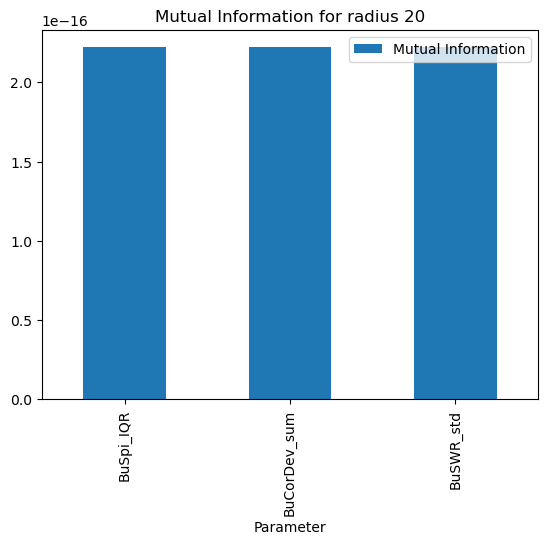

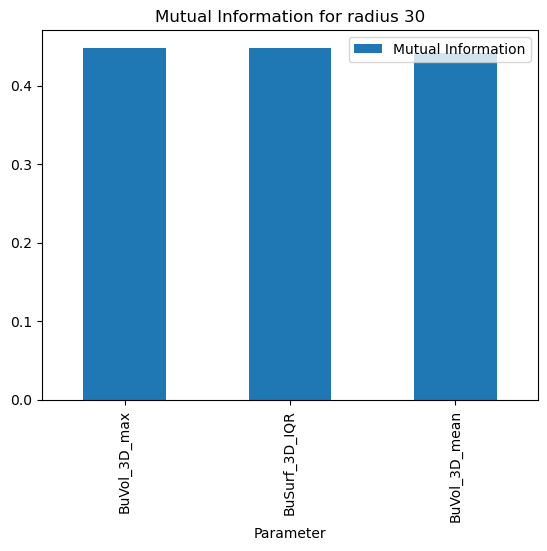

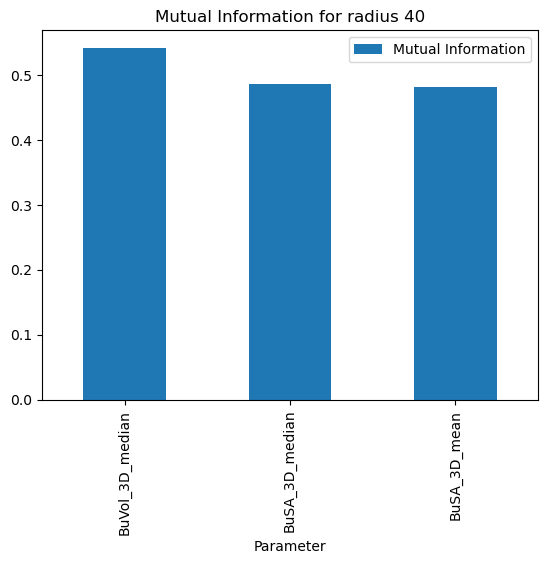

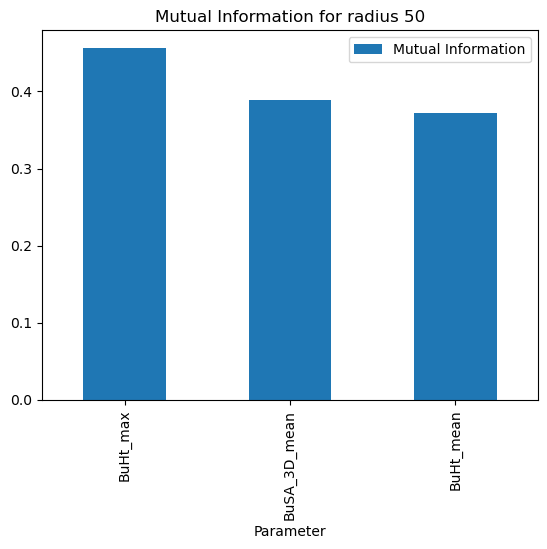

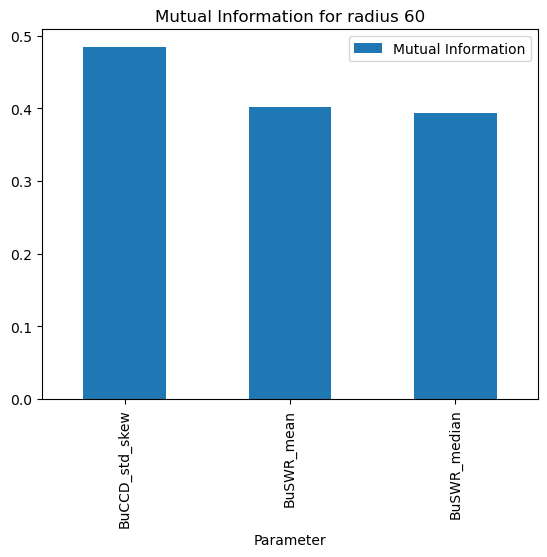

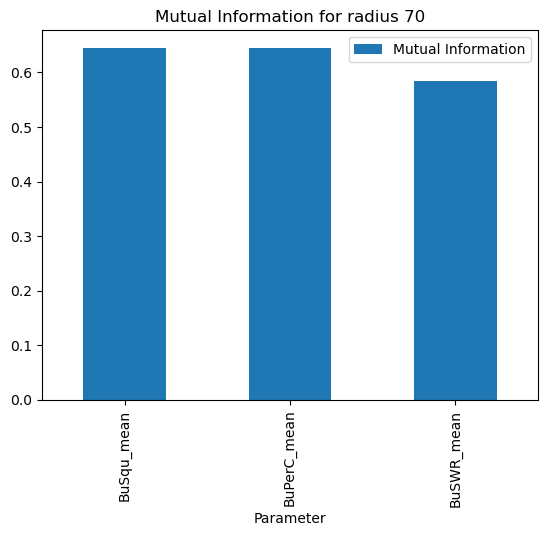

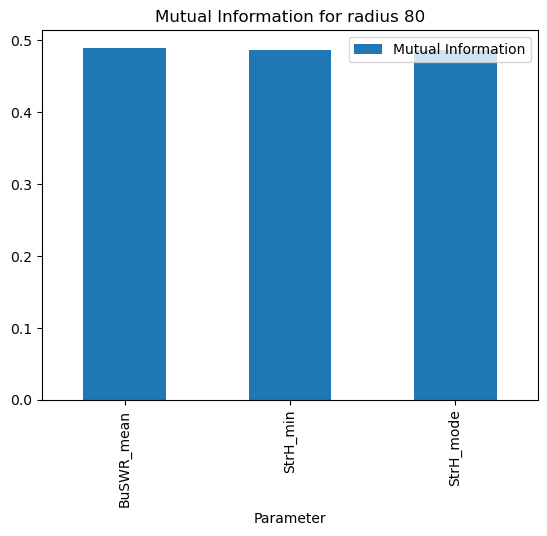

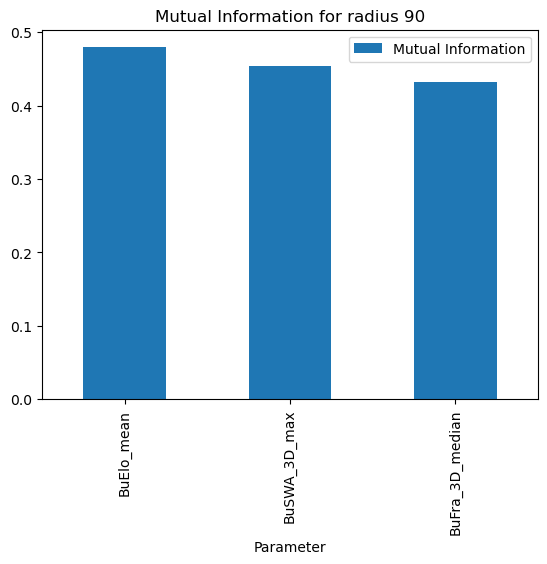

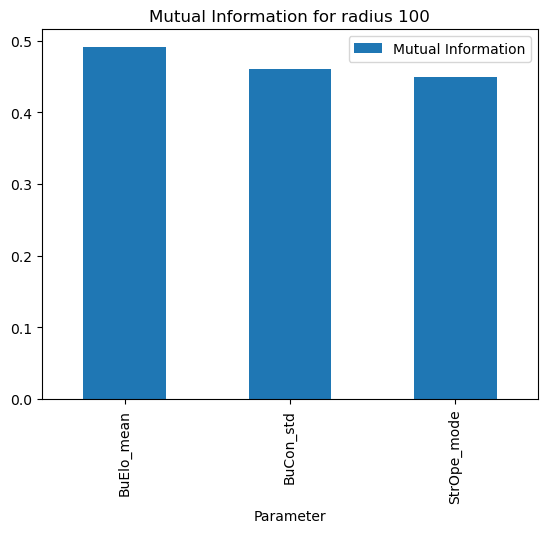

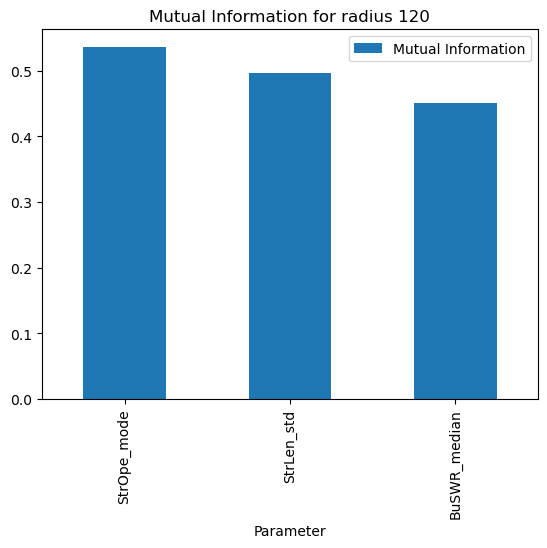

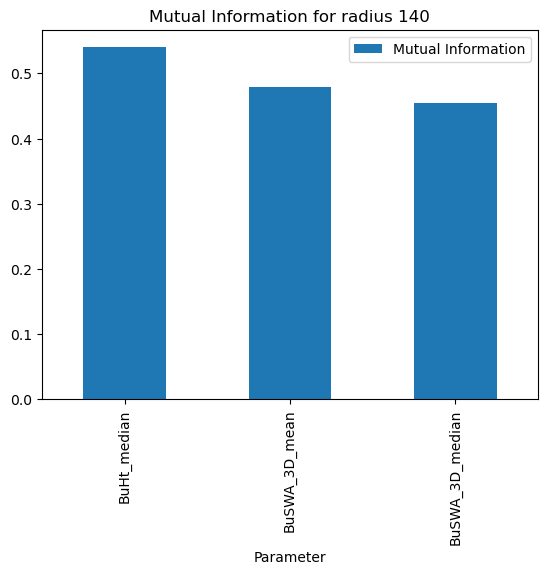

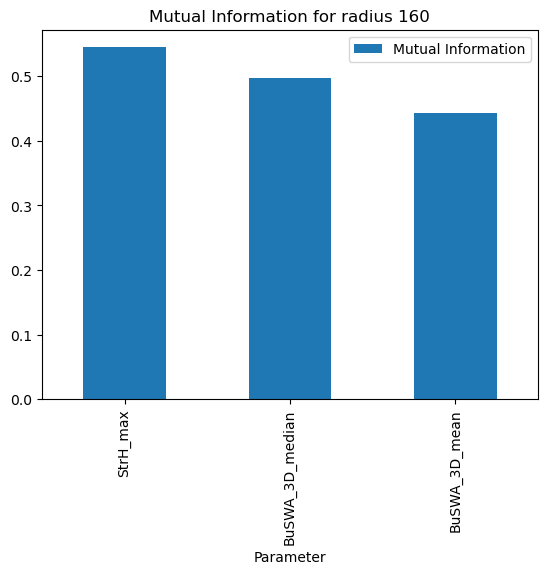

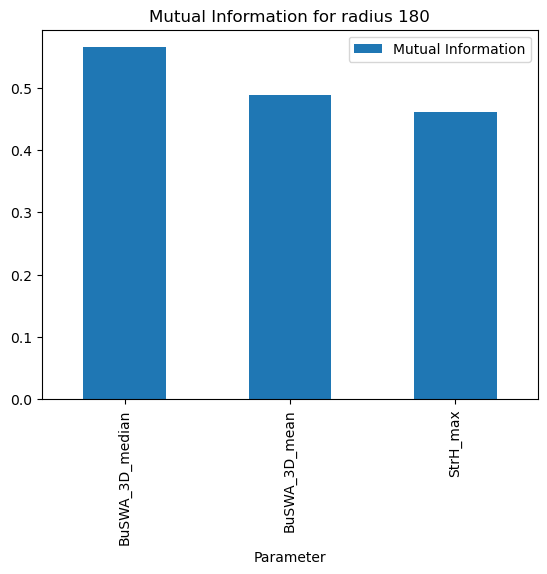

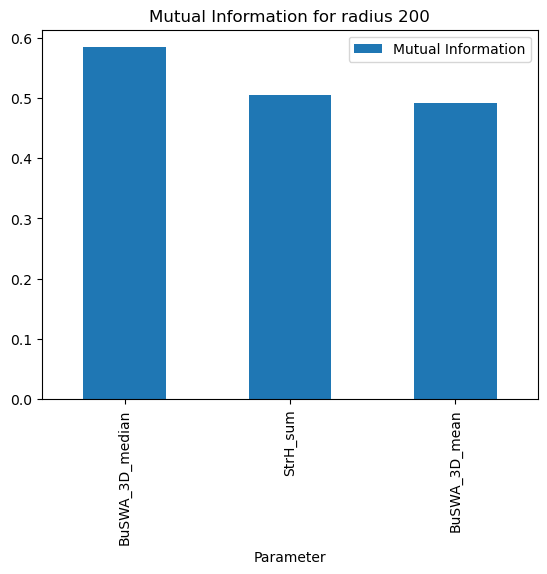

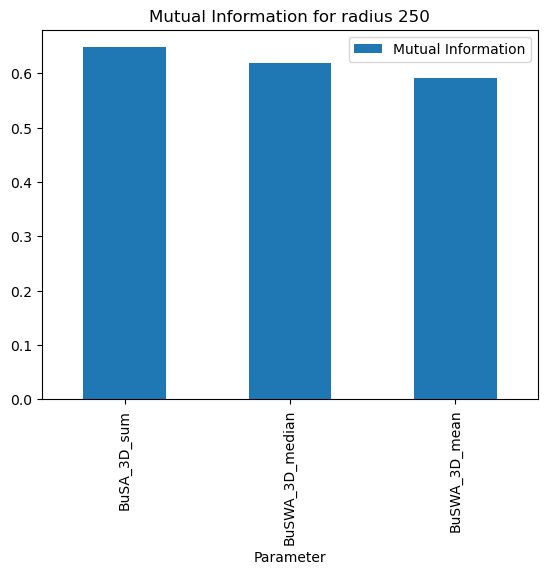

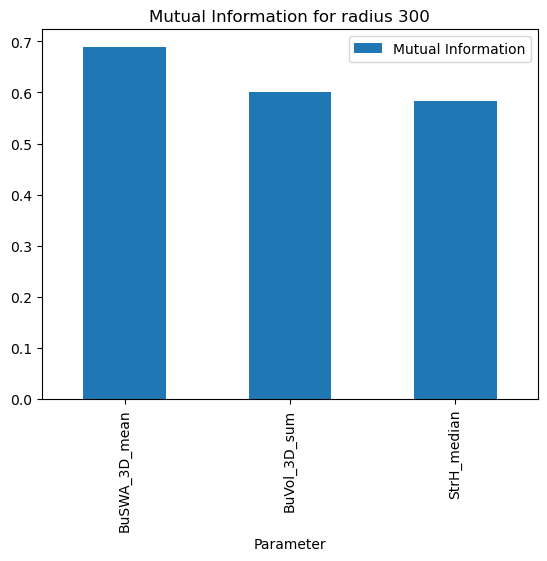

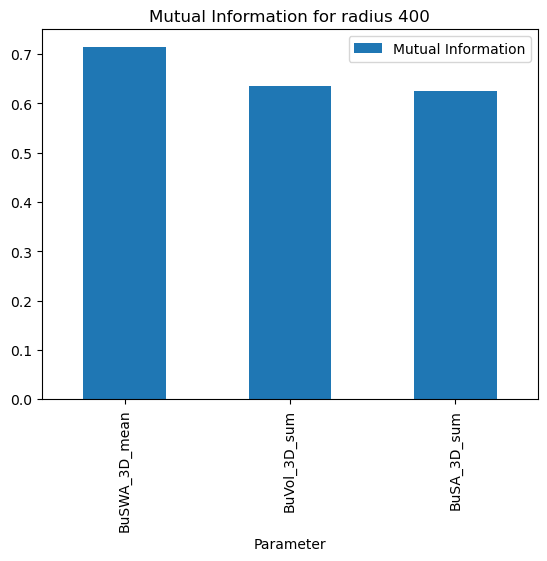

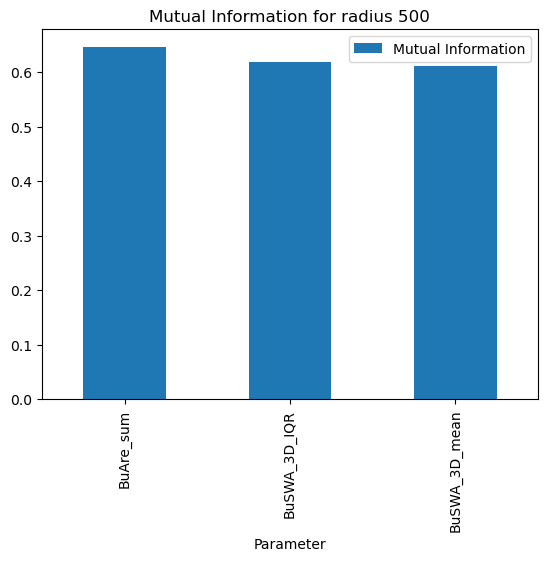

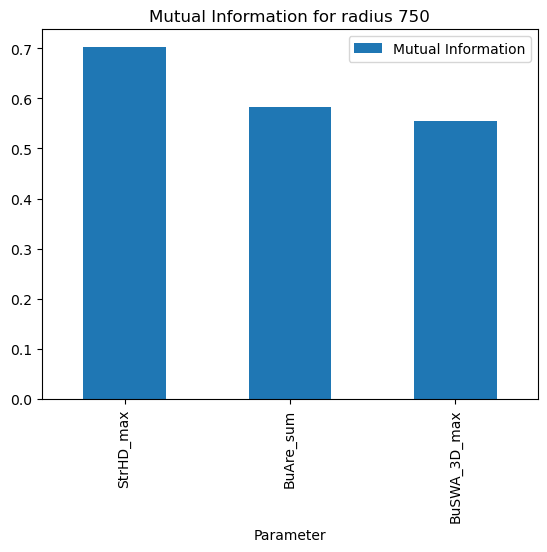

In [31]:
# plot mutual information of the top 3 parameters for each radius
for i in radii[1:]:
    stats_dict[i].sort_values(by='Mutual Information', ascending=False).head(3).plot(kind='bar', x='Parameter', y='Mutual Information')
    plt.title(f'Mutual Information for radius {i}')
    plt.show()

In [ ]:
# plot the mutual information for parameter StrHD_max across radii in stats_dict

In [18]:
# sort stats by mutual information
stats.sort_values(by='Mutual Information', ascending=False).head(50)

Parameter  Pearson Correlation  Pearson p-value  \
664   BuSWA_3D_median             0.772546     1.384983e-07   
763          StrH_max             0.749354     2.901875e-06   
663     BuSWA_3D_mean             0.744701     6.709384e-07   
783        StrHW_mean             0.746920     3.254084e-06   
784      StrHW_median             0.760831     1.660836e-06   
760       StrH_median             0.667652     7.595556e-05   
352   BuFra_3D_median            -0.577744     4.302516e-04   
742       StrOpe_mode            -0.569161     1.029446e-03   
31          BuPer_max             0.627315     4.230045e-05   
759         StrH_mean             0.718300     1.144896e-05   
691      BuVol_3D_max             0.580208     4.010990e-04   
665      BuSWA_3D_std             0.562047     6.642358e-04   
983        StrDeg_IQR            -0.161298     3.944807e-01   
736     StrOpe_median            -0.497667     5.136623e-03   
667      BuSWA_3D_max             0.570562     5.262372e-04   
872    StrBet1200_sum             0.551535     1.581786e-03   
787         StrHW_max             0.551091     1.946260e-03   
128         BuCWA_sum             0.651426     1.685202e-05   
16        BuHt_median             0.602894     2.045943e-04   
426       BuFF_3D_min            -0.283615     1.097174e-01   
430      BuFF_3D_mode            -0.283615     1.097174e-01   
668      BuSWA_3D_sum             0.651644     1.670571e-05   
764          StrH_sum             0.609428     3.506607e-04   
526       BuPerC_mode            -0.596639     2.475587e-04   
378         BuSqu_min            -0.596639     2.475587e-04   
382        BuSqu_mode            -0.596639     2.475587e-04   
522        BuPerC_min            -0.596639     2.475587e-04   
19           BuHt_max             0.600833     2.179525e-04   
931     StrCyc400_max             0.571363     9.740151e-04   
704       BuSA_3D_sum             0.713899     1.016216e-06   
688   BuVol_3D_median             0.363491     3.758881e-02   
257         BuSWR_std             0.558166     4.041006e-04   
927    StrCyc400_mean             0.595919     5.113138e-04   
147        BuElo_mean            -0.440240     7.209982e-03   
310        BuCir_mode            -0.582111     3.797940e-04   
306         BuCir_min            -0.582111     3.797940e-04   
700    BuSA_3D_median             0.325719     6.434611e-02   
692      BuVol_3D_sum             0.694381     2.633421e-06   
928  StrCyc400_median             0.609038     3.545779e-04   
780         StrHD_MAD             0.629291     6.797690e-03   
17           BuHt_std             0.255935     1.505435e-01   
713        StrLen_std            -0.417864     2.692031e-02   
502        BuSpi_mode            -0.584144     3.581528e-04   
68      BuCCD_std_sum             0.619028     5.702931e-05   
848    StrClo1200_sum             0.539664     2.085254e-03   
813    StrLin_nunique             0.533755     2.383893e-03   
498         BuSpi_min            -0.584144     3.581528e-04   
943    StrCyc1200_max             0.582784     7.263421e-04   
187          BuFF_max             0.429356     1.265005e-02   
773         StrHD_std             0.603262     1.104758e-03   

     Spearman Correlation  Spearman p-value  Mutual Information  
664              0.789087      4.868094e-08            0.518902  
763              0.794089      2.726142e-07            0.511858  
663              0.785995      5.959975e-08            0.478695  
783              0.783744      4.944852e-07            0.455495  
784              0.776847      7.226675e-07            0.421626  
760              0.719212      1.102510e-05            0.407326  
352             -0.715909      2.814377e-06            0.391316  
742             -0.664737      6.156025e-05            0.384235  
31               0.629601      3.889458e-05            0.378407  
759              0.756650      2.042349e-06            0.370837  
691              0.737968      9.537697e-07            0.364158  
665   

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/1135583305.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params['BuFra_3D_median'][i], params[time][i]))


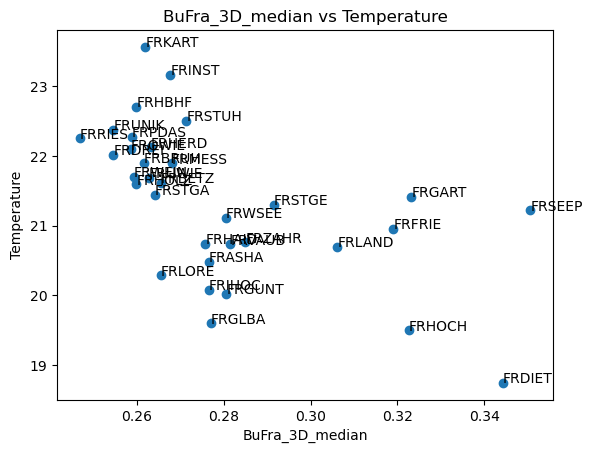

In [19]:
# plot params['BuFra_3D_median'] with temp and label by station_id

plt.scatter(params['BuFra_3D_median'], params[time])
plt.xlabel('BuFra_3D_median')
plt.ylabel('Temperature')
plt.title('BuFra_3D_median vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params['BuFra_3D_median'][i], params[time][i]))

plt.show()

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/7037039.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


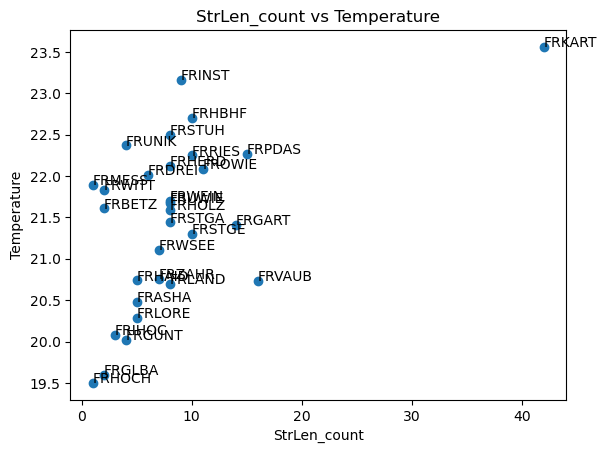

In [20]:
# plot params['BuFra_3D_median'] with temp and label by station_id

var = 'StrLen_count'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/1345998645.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


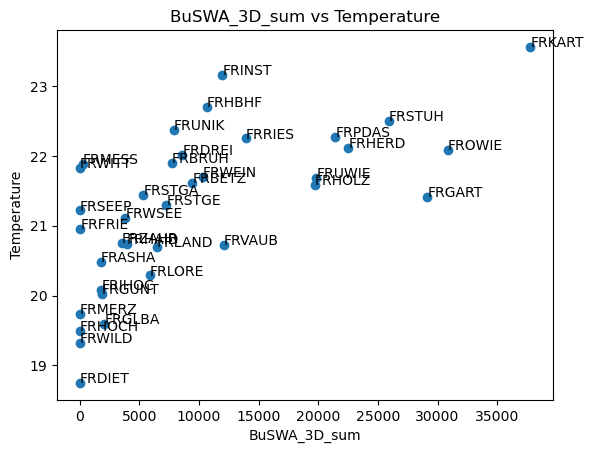

In [21]:
var = 'BuSWA_3D_sum'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/568291608.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (params[var][i], params[time][i]))


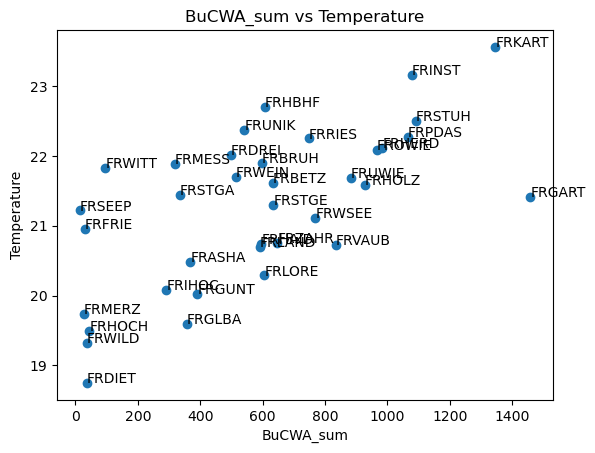

In [22]:
var = 'BuCWA_sum'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()

In [23]:
# select stats where mutual information is higher than absolute 0.1
selected_stats = stats[stats['Mutual Information']>0.2]

In [24]:
len(selected_stats)

127

In [25]:
selected_stats

Parameter  Pearson Correlation  Pearson p-value  \
1                 BuIBD            -0.322065     6.323355e-02   
15            BuHt_mean             0.581030     3.917693e-04   
16          BuHt_median             0.602894     2.045943e-04   
17             BuHt_std             0.255935     1.505435e-01   
19             BuHt_max             0.600833     2.179525e-04   
31            BuPer_max             0.627315     4.230045e-05   
32            BuPer_sum             0.599531     1.115093e-04   
43            BuLAL_max             0.631032     3.689085e-05   
44            BuLAL_sum             0.605918     8.995352e-05   
49           BuLAL_skew             0.420478     1.066672e-02   
56       BuCCD_mean_sum             0.586985     1.678496e-04   
68        BuCCD_std_sum             0.619028     5.702931e-05   
85           BuCor_skew             0.593326     1.722495e-04   
113           BuCCo_std             0.566149     3.193780e-04   
120           BuCCo_MAD             0.699084     2.107896e-06   
127           BuCWA_max             0.624335     4.714495e-05   
128           BuCWA_sum             0.651426     1.685202e-05   
147          BuElo_mean            -0.440240     7.209982e-03   
162           BuERI_min            -0.535758     7.585860e-04   
166          BuERI_mode            -0.535758     7.585860e-04   
183           BuFF_mean             0.161171     3.702326e-01   
184         BuFF_median             0.051340     7.766107e-01   
187            BuFF_max             0.429356     1.265005e-02   
197            BuFD_std             0.331523     4.824597e-02   
221           BuShI_std             0.582729     1.920996e-04   
228           BuShI_MAD             0.666733     8.999848e-06   
233           BuSqC_std             0.283605     9.370069e-02   
255          BuSWR_mean             0.555426     4.374942e-04   
257           BuSWR_std             0.558166     4.041006e-04   
264           BuSWR_MAD             0.512223     1.404740e-03   
292       StrAli_median            -0.496211     2.084542e-03   
305           BuCir_std             0.273250     1.238954e-01   
306           BuCir_min            -0.582111     3.797940e-04   
310          BuCir_mode            -0.582111     3.797940e-04   
318        BuHem_3D_min            -0.157323     3.819167e-01   
322       BuHem_3D_mode            -0.157323     3.819167e-01   
329        BuCon_3D_std             0.127121     4.808313e-01   
352     BuFra_3D_median            -0.577744     4.302516e-04   
377           BuSqu_std             0.329507     6.112873e-02   
378           BuSqu_min            -0.596639     2.475587e-04   
382          BuSqu_mode            -0.596639     2.475587e-04   
390       BuCube_3D_min            -0.143200     4.266064e-01   
394      BuCube_3D_mode            -0.143200     4.266064e-01   
426         BuFF_3D_min            -0.283615     1.097174e-01   
430        BuFF_3D_mode            -0.283615     1.097174e-01   
450          BuProx_min            -0.614685     1.412656e-04   
454         BuProx_mode            -0.614685     1.412656e-04   
473            BuEx_std             0.492857     3.567904e-03   
498           BuSpi_min            -0.584144     3.581528e-04   
502          BuSpi_mode            -0.584144     3.581528e-04   
521          BuPerC_std             0.329507     6.112873e-02   
522          BuPerC_min            -0.596639     2.475587e-04   
526         BuPerC_mode            -0.596639     2.475587e-04   
534         BuCf_3D_min            -0.143200     4.266064e-01   
538        BuCf_3D_mode            -0.143200     4.266064e-01   
593          BuDisp_std             0.507685     2.562000e-03   
604    BuDisp_3D_median             0.229728     1.984135e-01   
659      BuRough_3D_IQR            -0.123327     5.086315e-01   
663       BuSWA_3D_mean             0.744701     6.709384e-07   
664     BuSWA_3D_median             0.772546     1.384983e-07   
665        BuSWA_3D_std             0.562047     

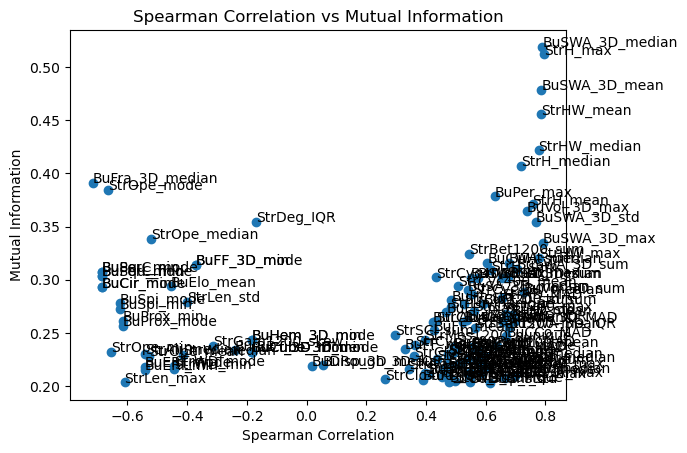

In [26]:
# plot spearman correlation and mutual information on plot for selected stats
# colour by groups

plt.scatter(selected_stats['Spearman Correlation'], selected_stats['Mutual Information'])
plt.xlabel('Spearman Correlation')
plt.ylabel('Mutual Information')
plt.title('Spearman Correlation vs Mutual Information') 

for i, txt in enumerate(selected_stats['Parameter']):
    plt.annotate(txt, (selected_stats['Spearman Correlation'].iloc[i], selected_stats['Mutual Information'].iloc[i]))
    
plt.show()


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
params_scaled = scaler.fit_transform(params)
params_scaled = pd.DataFrame(params_scaled, columns=params.columns, index=params.index)
params_scaled.columns.name = 'Parameter'
# remove columns with more than 7 NaN values
#params_scaled = params_scaled.dropna(thresh=params_scaled.shape[0] - 7, axis=1)

/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/lisawink/.conda/envs/py312_uscuni_buildingfootprints/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [52]:
params_scaled[selected_stats['Parameter']]

BuIBD  BuHt_mean  BuHt_median  BuHt_std  BuHt_max  BuPer_max  \
station_id                                                                    
FRASHA      0.171993   0.095711    -0.115551 -0.131864 -0.345133  -0.002410   
FRBETZ     -0.006910   0.299291     0.077807  0.959928  0.455541   0.921929   
FRBRUH      0.551857  -0.592085    -0.904553  0.729122  0.451286   1.271763   
FRDIET           NaN  -0.186463    -0.999725  2.737896  0.152578  -0.470714   
FRDREI      0.664923   1.183359     1.467727 -0.089136  0.126537   0.009717   
FRFRIE     -0.527117  -1.998227    -1.745284 -1.485882 -1.576239  -1.245978   
FRGART     -0.439077  -0.603049    -0.526625 -1.360233 -0.808191  -1.141931   
FRGLBA      0.126640  -0.087925    -0.006567 -0.492788 -0.410488  -1.073739   
FRGUNT     -0.006552  -0.490683    -0.345823 -0.529913 -0.594192  -1.064892   
FRHAID     -0.145779  -0.940761    -1.052710 -0.203711 -0.481720   0.472636   
FRHBHF     -0.511324   0.991825     0.955830  1.241843  2.706084   0.696559   
FRHERD     -0.371138   0.991426     1.142031  0.348864  0.216312   0.995610   
FRHOCH     -0.759652  -1.878343    -1.694308 -1.419036 -1.504703  -1.132583   
FRHOLZ     -0.315542   0.751331     0.765610  0.061492  0.036661   1.003656   
FRIHOC      0.585896  -0.907314    -1.134699 -0.037968 -0.291025   0.365745   
FRINST     -0.385600   0.535465     0.168209  2.572586  3.398948   0.445475   
FRKART     -0.836160   1.092922     0.864047 -0.081711  0.686564   1.527762   
FRLAND     -0.162776  -1.467604    -1.185801 -0.527757 -0.355063  -0.144403   
FRLORE      0.012444   0.150123     0.133053 -0.521672 -0.379888  -0.592508   
FRMERZ     -1.262307        NaN          NaN       NaN       NaN  -1.517193   
FRMESS      0.760421  -0.934552    -1.024460 -0.100812 -0.498642   1.175653   
FROWIE     -0.525264   1.374941     1.592279 -0.142721  0.009202  -0.527736   
FRPDAS      0.093414   1.020298     0.888029  1.240790  1.248211   1.797975   
FRRIES     -0.095468   1.666751     1.542056 -0.652635  0.112149   0.278888   
FRSEEP           NaN  -2.098331    -1.867326 -1.298677 -1.582623  -1.185807   
FRSTGA      1.045129   0.292243     0.493653 -0.050923 -0.363169  -0.331213   
FRSTGE     -0.366967  -0.574408    -0.491218 -0.794038 -0.515867  -0.388120   
FRSTUH     -0.743604   0.816706     1.012707  0.575345  0.799744   1.042315   
FRUNIK     -0.355264   1.054486     1.306511  0.265139 -0.103269   2.295718   
FRUWIE     -0.446248   0.825358     0.933480 -0.047026  0.057535  -0.650048   
FRVAUB     -0.235476   0.375116     0.478335 -0.697040 -0.278664   0.047308   
FRWEIN      0.257066   0.418600     0.303183  1.466600  0.572167   1.113474   
FRWILD      5.047927        NaN          NaN       NaN       NaN  -1.054003   
FRWITT     -0.400864        NaN          NaN       NaN       NaN  -1.257218   
FRWSEE     -0.204266  -0.259275    -0.271744 -0.691826 -0.081991  -0.649655   
FRZAHR     -0.214356  -0.916931    -0.758153 -0.842238 -0.858651  -1.032030   

            BuPer_sum  BuLAL_max  BuLAL_sum  BuLAL_skew  BuCCD_mean_sum  \
station_id                                                                
FRASHA      -0.435765   0.092975  -0.426511    1.371321       -0.386294   
FRBETZ       0.219765   0.136890   0.156613    0.756106        0.174543   
FRBRUH      -0.102859   1.533037  -0.091868   -1.520885       -0.136317   
FRDIET      -1.554921  -0.516497  -1.555930   -0.813124       -1.582682   
FRDREI      -0.251545   0.053407  -0.209105    0.161413       -0.193757   
FRFRIE      -1.556474  -1.038158  -1.541775   -1.663150       -1.541914   
FRGART       1.489071  -1.024710   1.707365    0.939242        1.728575   
FRGLBA      -0.384875  -0.990048  -0.408331   -0.773632       -0.386588   
FRGUNT      -0.316066  -1.003410  -0.352127   -0.516341       -0.312157   
FRHAID       0.078546   0.703824   0.103415   -0.363663        0.076112   
FRHBHF      -0.092573   0.159918  -0.031906    0.038462        0.057862   
FRHERD       1.121014   0.661852   1.

In [ ]:
params_scaled = params_scaled.dropna(thresh=params_scaled.shape[0] - 7, axis=1)

In [28]:
# do a factor analysis of every variable in selected stats

from sklearn.decomposition import FactorAnalysis

X_scaled = params_scaled.dropna()

# Step 2: Determine the number of factors (e.g., set manually or use eigenvalues)
n_factors = 12  # Example: Choose 5 factors

# Step 3: Perform Factor Analysis
fa = FactorAnalysis(n_components=n_factors, random_state=0)
fa.fit(X_scaled)

# Step 4: Analyze Results
factor_loadings = pd.DataFrame(fa.components_.T, index=X_scaled.columns, columns=[f"Factor {i+1}" for i in range(n_factors)])

# Display the factor loadings
print(factor_loadings)


                    Factor 1  Factor 2  Factor 3  Factor 4      Factor 5  \
Parameter                                                                  
BuIBD              -0.225587 -0.019805  0.030501 -0.089479  2.016082e-03   
BuHt_mean           0.331848 -0.213947 -0.384929 -0.013704  1.967287e-01   
BuHt_median         0.305028 -0.185425 -0.415266  0.040599  2.031482e-01   
BuHt_std           -0.019707 -0.358750 -0.248978  0.008875  6.714440e-02   
BuHt_max            0.218454 -0.291116 -0.278836 -0.106931  4.695800e-02   
BuPer_max           0.148666 -0.740763 -0.177524 -0.111418 -1.510628e-02   
BuPer_sum           0.525406  0.102926 -0.073333  0.235174  1.053460e-01   
BuLAL_max           0.184260 -0.670426 -0.045036 -0.257448  9.686008e-03   
BuLAL_sum           0.539923  0.104934 -0.050917  0.213565  8.200616e-02   
BuLAL_skew          0.279401 -0.122406 -0.161244  0.411133  7.218860e-02   
BuCCD_mean_sum      0.526930  0.121636 -0.023233  0.236972  4.114088e-02   
BuCCD_std_su

In [29]:
# for each factor, print the top 5 highest loadings
factor_loadings_abs = factor_loadings.abs()

for i in range(n_factors):
    print(factor_loadings_abs.nlargest(5, f'Factor {i+1}'))


                Factor 1  Factor 2  Factor 3  Factor 4      Factor 5  \
Parameter                                                              
StrLen_count     1.01157  0.124848  0.187236  0.015385  1.624571e-09   
StrLen_nunique   1.01157  0.124848  0.187236  0.015385  1.624571e-09   
StrW_count       1.01157  0.124848  0.187236  0.015385  1.624571e-09   
StrOpe_count     1.01157  0.124848  0.187236  0.015385  1.624571e-09   
StrLin_count     1.01157  0.124848  0.187236  0.015385  1.624571e-09   

                    Factor 6      Factor 7      Factor 8      Factor 9  \
Parameter                                                                
StrLen_count    5.348643e-10  4.757182e-11  1.971684e-11  1.011623e-11   
StrLen_nunique  5.348643e-10  4.757182e-11  1.971684e-11  1.011623e-11   
StrW_count      5.348643e-10  4.757182e-11  1.971684e-11  1.011623e-11   
StrOpe_count    5.348643e-10  4.757182e-11  1.971684e-11  1.011623e-11   
StrLin_count    5.348643e-10  4.757182e-11  1.97168

In [57]:
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
alt.data_transformers.enable("vegafusion")

corr = params_scaled[selected_stats['Parameter']].corr()
long_df = corr.reset_index().melt(id_vars='Parameter', var_name='Variable', value_name='Correlation')

# Create the heatmap using Altair
heatmap = alt.Chart(long_df).mark_rect().encode(
    x=alt.X('Parameter:N', title='Variables', sort=None),  # Column names
    y=alt.Y('Variable:N', title='Variables', sort=None),  # Row names
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='viridis'), title='Correlation'),
    tooltip=['Parameter', 'Variable', 'Correlation']  # Tooltips for interactivity
).properties(
    width=1000,
    height=1000,
    title='Correlation Heatmap'
).interactive()

# Display the heatmap
heatmap.show()

alt.Chart(...)

In [58]:
# find groups of highly correlated variables

# Step 1: Define a threshold for correlation
threshold = 0.9

# Step 2: Find groups of highly correlated variables
groups = []

for i, row in corr.iterrows():
    group = [i]
    for j, value in row.items():
        if i != j and value > threshold:
            group.append(j)
    if len(group) > 1:
        group = sorted(group)
        groups.append(group)

# Display the groups
for group in groups:
    print(group)


['BuHt_mean', 'BuHt_median', 'StrH_mean']
['BuHt_mean', 'BuHt_median']
['BuCWA_max', 'BuLAL_max', 'BuPer_max']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum', 'BuSA_3D_sum']
['BuCWA_max', 'BuLAL_max', 'BuPer_max']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum', 'BuSWA_3D_sum']
['BuCCo_std', 'BuDisp_std', 'BuShI_std']
['BuCCo_MAD', 'BuShI_MAD']
['BuCWA_max', 'BuLAL_max', 'BuPer_max']
['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum', 'BuSA_3D_sum']
['BuERI_min', 'BuERI_mode']
['BuERI_min', 'BuERI_mode']
['BuFF_mean', 'BuFF_median']
['BuFF_mean', 'BuFF_median']
['BuFD_std', 'BuSqC_std']
['BuCCo_std', 'BuDisp_std', 'BuShI_std']
['BuCCo_MAD', 'BuShI_MAD']
['BuCir_std', 'BuFD_std', 'BuPerC_std', 'BuSqC_std', 'BuSqu_std']
['BuCir_std', 'BuPerC_std', 'BuSqC_std', 'BuSq

In [59]:
# remove duplicate groups from groups
unique_groups = []

for group in groups:
    if group not in unique_groups:
        unique_groups.append(group) 

unique_groups


[['BuHt_mean', 'BuHt_median', 'StrH_mean'],
 ['BuHt_mean', 'BuHt_median'],
 ['BuCWA_max', 'BuLAL_max', 'BuPer_max'],
 ['BuCCD_mean_sum',
  'BuCCD_std_sum',
  'BuCWA_sum',
  'BuLAL_sum',
  'BuPer_sum',
  'BuSA_3D_sum'],
 ['BuCCD_mean_sum', 'BuCCD_std_sum', 'BuCWA_sum', 'BuLAL_sum', 'BuPer_sum'],
 ['BuCCD_mean_sum',
  'BuCCD_std_sum',
  'BuCWA_sum',
  'BuLAL_sum',
  'BuPer_sum',
  'BuSWA_3D_sum'],
 ['BuCCo_std', 'BuDisp_std', 'BuShI_std'],
 ['BuCCo_MAD', 'BuShI_MAD'],
 ['BuERI_min', 'BuERI_mode'],
 ['BuFF_mean', 'BuFF_median'],
 ['BuFD_std', 'BuSqC_std'],
 ['BuCir_std', 'BuFD_std', 'BuPerC_std', 'BuSqC_std', 'BuSqu_std'],
 ['BuCir_std', 'BuPerC_std', 'BuSqC_std', 'BuSqu_std'],
 ['BuCir_min',
  'BuCir_mode',
  'BuPerC_min',
  'BuPerC_mode',
  'BuSqu_min',
  'BuSqu_mode'],
 ['BuCf_3D_min',
  'BuCf_3D_mode',
  'BuCube_3D_min',
  'BuCube_3D_mode',
  'BuHem_3D_min',
  'BuHem_3D_mode'],
 ['BuFF_3D_min', 'BuFF_3D_mode'],
 ['BuProx_min', 'BuProx_mode', 'BuSpi_min', 'BuSpi_mode'],
 ['BuDisp_std',

In [60]:
# add a group label to selected subsets for unique groups
selected_stats['Group'] = None

for i, row in selected_stats.iterrows():
    for group in unique_groups:
        if row['Parameter'] in group:
            selected_stats.loc[i, 'Group'] = str(group)

selected_stats

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2278654410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stats['Group'] = None


Parameter  Pearson Correlation  Pearson p-value  \
1                 BuIBD            -0.322065     6.323355e-02   
15            BuHt_mean             0.581030     3.917693e-04   
16          BuHt_median             0.602894     2.045943e-04   
17             BuHt_std             0.255935     1.505435e-01   
19             BuHt_max             0.600833     2.179525e-04   
31            BuPer_max             0.627315     4.230045e-05   
32            BuPer_sum             0.599531     1.115093e-04   
43            BuLAL_max             0.631032     3.689085e-05   
44            BuLAL_sum             0.605918     8.995352e-05   
49           BuLAL_skew             0.420478     1.066672e-02   
56       BuCCD_mean_sum             0.586985     1.678496e-04   
68        BuCCD_std_sum             0.619028     5.702931e-05   
85           BuCor_skew             0.593326     1.722495e-04   
113           BuCCo_std             0.566149     3.193780e-04   
120           BuCCo_MAD             0.699084     2.107896e-06   
127           BuCWA_max             0.624335     4.714495e-05   
128           BuCWA_sum             0.651426     1.685202e-05   
147          BuElo_mean            -0.440240     7.209982e-03   
162           BuERI_min            -0.535758     7.585860e-04   
166          BuERI_mode            -0.535758     7.585860e-04   
183           BuFF_mean             0.161171     3.702326e-01   
184         BuFF_median             0.051340     7.766107e-01   
187            BuFF_max             0.429356     1.265005e-02   
197            BuFD_std             0.331523     4.824597e-02   
221           BuShI_std             0.582729     1.920996e-04   
228           BuShI_MAD             0.666733     8.999848e-06   
233           BuSqC_std             0.283605     9.370069e-02   
255          BuSWR_mean             0.555426     4.374942e-04   
257           BuSWR_std             0.558166     4.041006e-04   
264           BuSWR_MAD             0.512223     1.404740e-03   
292       StrAli_median            -0.496211     2.084542e-03   
305           BuCir_std             0.273250     1.238954e-01   
306           BuCir_min            -0.582111     3.797940e-04   
310          BuCir_mode            -0.582111     3.797940e-04   
318        BuHem_3D_min            -0.157323     3.819167e-01   
322       BuHem_3D_mode            -0.157323     3.819167e-01   
329        BuCon_3D_std             0.127121     4.808313e-01   
352     BuFra_3D_median            -0.577744     4.302516e-04   
377           BuSqu_std             0.329507     6.112873e-02   
378           BuSqu_min            -0.596639     2.475587e-04   
382          BuSqu_mode            -0.596639     2.475587e-04   
390       BuCube_3D_min            -0.143200     4.266064e-01   
394      BuCube_3D_mode            -0.143200     4.266064e-01   
426         BuFF_3D_min            -0.283615     1.097174e-01   
430        BuFF_3D_mode            -0.283615     1.097174e-01   
450          BuProx_min            -0.614685     1.412656e-04   
454         BuProx_mode            -0.614685     1.412656e-04   
473            BuEx_std             0.492857     3.567904e-03   
498           BuSpi_min            -0.584144     3.581528e-04   
502          BuSpi_mode            -0.584144     3.581528e-04   
521          BuPerC_std             0.329507     6.112873e-02   
522          BuPerC_min            -0.596639     2.475587e-04   
526         BuPerC_mode            -0.596639     2.475587e-04   
534         BuCf_3D_min            -0.143200     4.266064e-01   
538        BuCf_3D_mode            -0.143200     4.266064e-01   
593          BuDisp_std             0.507685     2.562000e-03   
604    BuDisp_3D_median             0.229728     1.984135e-01   
659      BuRough_3D_IQR            -0.123327     5.086315e-01   
663       BuSWA_3D_mean             0.744701     6.709384e-07   
664     BuSWA_3D_median             0.772546     1.384983e-07   
665        BuSWA_3D_std             0.562047     

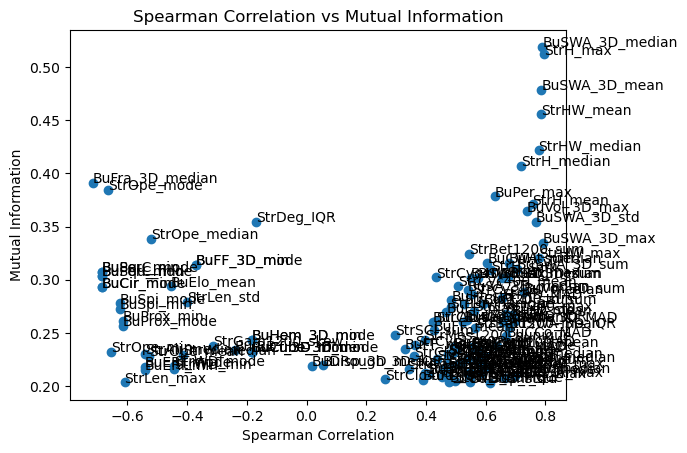

In [61]:
# plot spearman correlation and mutual information on plot for selected stats
# colour by groups

plt.scatter(selected_stats['Spearman Correlation'], selected_stats['Mutual Information'])
plt.xlabel('Spearman Correlation')
plt.ylabel('Mutual Information')
plt.title('Spearman Correlation vs Mutual Information') 

for i, txt in enumerate(selected_stats['Parameter']):
    plt.annotate(txt, (selected_stats['Spearman Correlation'].iloc[i], selected_stats['Mutual Information'].iloc[i]))

plt.show()

In [63]:
scaled_subselect = params_scaled[selected_stats['Parameter']]
scaled_subselect[time] = params_scaled[time]

# Create the new structure
rows = []
for station_id, row in scaled_subselect.iterrows():
    y = row[time]
    for param in scaled_subselect.columns[:-1]:  # Exclude 'y'
        rows.append({
            "station_id": station_id,
            "x": row[param],
            "y": y,
            "Parameter": param
        })

# Create the transformed DataFrame
transformed_df = pd.DataFrame(rows).set_index("station_id")

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/2103248120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_subselect[time] = params_scaled[time]


In [64]:
params =  transformed_df

# Left plot: R-squared vs Gradient scatter plot
selection = alt.selection_point(fields=['Parameter'], empty='none', on='click', toggle='event.shiftKey')  # Selection on param
selection1 = alt.selection_point(fields=['Group'], bind='legend', on='click', toggle='event.shiftKey')
selection2 = alt.selection_point(fields=['stats'], bind='legend', on='click', toggle='event.shiftKey')

params['station_id'] = params.index
selected_stats['stats'] = selected_stats['Parameter'].str.split('_').str[1]

# Step 2: Add category coloring to scatter plot
category_colors = alt.Scale(scheme='category10')  # Use a predefined Altair color scheme

scatter_plot = alt.Chart(selected_stats).mark_point(size=100).encode(
    x=alt.X('Spearman Correlation:Q', title='Spearman Correlation'),
    y=alt.Y('Mutual Information:Q', title='Mutual Information'),
    color=alt.condition(selection1, 'Group:N', alt.value('lightgray')),
    shape=alt.Shape('stats:N', title='Statistic'),
    opacity=alt.condition(selection2, alt.value(1), alt.value(0.2)),
    tooltip=['Parameter', 'Group', 'Spearman Correlation', 'Mutual Information']
).add_params(
    selection, selection1, selection2
).properties(
    title='Gradient vs R-squared',
    width=400,
    height=300
).interactive()

# Step 3: Right plot remains the same
points = alt.Chart(params).transform_filter(
    selection
).mark_point().encode(
    x=alt.X('x:Q', title='X'),
    y=alt.Y('y:Q', title='Temperature'),
    tooltip=['x', 'y']
)

# Create the text labels for the station IDs
text_labels = alt.Chart(params).transform_filter(
    selection
).mark_text(
    align='left', 
    baseline='middle', 
    dx=5,  # Slightly offset the text so it doesn't overlap the point
).encode(
    x='x',
    y='y',
    text='station_id'  # Use station_id as the label
)

regression_plot = (points + text_labels).properties(
    title='Linear Regression Plot',
    width=400,
    height=300
).interactive()

# Combine the plots
final_chart = alt.vconcat(scatter_plot, regression_plot)
final_chart.show()

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_88283/3141452479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_stats['stats'] = selected_stats['Parameter'].str.split('_').str[1]


alt.VConcatChart(...)

In [38]:
params.head(10)

x      y          param station_id
station_id                                              
FRASHA         0.878049  20.48          BuAdj     FRASHA
FRASHA        24.276496  20.48          BuIBD     FRASHA
FRASHA        43.000000  20.48    BuAre_count     FRASHA
FRASHA       193.699062  20.48     BuAre_mean     FRASHA
FRASHA       122.522569  20.48   BuAre_median     FRASHA
FRASHA       215.664915  20.48      BuAre_std     FRASHA
FRASHA         7.117262  20.48      BuAre_min     FRASHA
FRASHA      1290.401823  20.48      BuAre_max     FRASHA
FRASHA      8329.059679  20.48      BuAre_sum     FRASHA
FRASHA        43.000000  20.48  BuAre_nunique     FRASHA

In [ ]:
var = 'BuSWA_3D_sum'

plt.scatter(params[var], params[time])
plt.xlabel(var)
plt.ylabel('Temperature')
plt.title(var+' vs Temperature')

for i, txt in enumerate(params.index):
    plt.annotate(txt, (params[var][i], params[time][i]))


plt.show()